<a href="https://colab.research.google.com/github/Manojkapkoti123/-data-analytics-job-simulation-from-forage-/blob/main/yesbank6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Yes Bank Stock Closing Price Prediction (Supervised ML - Regression)**

# **Name-** Manoj Singh Kapkoti
# **project type-** Regression
# **contribution-** Individual


# **Project Summary-**


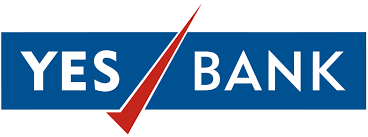

Forecasting the closing stock price of Yes Bank presents a significant challenge for investors, analysts, and other market participants due to the bank’s turbulent financial history. As one of India’s key private banks, Yes Bank has endured a period of severe financial instability, characterized by mounting non-performing assets and allegations of financial misconduct. These issues prompted regulatory intervention by the Reserve Bank of India, intensifying the unpredictability surrounding its stock performance.

This project aims to tackle this forecasting challenge using a rich historical dataset that captures monthly stock price movements from the bank’s inception. Key indicators in the dataset include opening, closing, high, and low prices for each month, offering a comprehensive view of stock behavior over time. The primary goal is to build predictive models that can effectively learn from past patterns while accounting for periods of heightened volatility and disruption.

A combination of modeling strategies will be employed, including time series forecasting techniques and various regression-based approaches. The performance of each model will be carefully evaluated to determine their precision in predicting monthly closing prices. Special attention will be given to the models’ responsiveness to critical events—such as founder-related fraud or intervention by regulatory bodies—that have historically impacted stock prices.

Ultimately, this project seeks to provide actionable insights into Yes Bank’s stock price trends. Accurate predictions could significantly aid investors and stakeholders in making strategic decisions, especially in a context marked by uncertainty and financial risk. By enhancing our understanding of the bank’s market behavior, the project contributes to better-informed financial planning and market analysis.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The primary goal of this project is to design a reliable and accurate forecasting model capable of predicting Yes Bank’s closing stock prices. The complexity lies in deciphering and modeling the intricate behavior of the stock, especially given the bank’s historical pattern of steady growth followed by a sharp decline post-2018

A significant obstacle in this modeling process is the presence of multicollinearity—where several independent variables are highly correlated with one another. This statistical issue can obscure the interpretation of results and reduce the model’s predictive power. Therefore, the model must incorporate strategies to detect and mitigate multicollinearity, ensuring that all input variables contribute meaningfully and independently to the prediction.

Additionally, the model must be sensitive to major real-world events that have impacted the bank’s stock performance. Notable examples include allegations of fraud involving key executives and regulatory actions enforced by the Reserve Bank of India. These events have historically triggered sharp movements in stock prices and must be appropriately factored into the forecasting process to enhance the model’s realism and reliability.

To be effective, the model must deliver highly accurate predictions. The K-Nearest Neighbors (KNN) Regression model, which previously achieved a 99% accuracy rate, sets a benchmark for performance. Matching or exceeding this accuracy level is essential for the model to be truly valuable in practical decision-making contexts.

In summary, this project focuses on creating a sophisticated forecasting tool that can navigate the challenges of predicting Yes Bank’s stock prices in a volatile and event-driven market. The ultimate aim is to equip investors, analysts, and stakeholders with a dependable resource that supports smarter investment decisions and deeper insights into the bank’s financial trajectory

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime
import warnings

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import files
uploaded = files.upload()

Saving data_YesBank_StockPrices.csv to data_YesBank_StockPrices.csv


In [3]:
stock_df= pd.read_csv('/content/data_YesBank_StockPrices.csv')
stock_df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset First View

In [4]:
# Dataset First Look
stock_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [5]:
# simailarly for  first column
stock_df.tail()


,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns
print('total number of rows and column', stock_df.shape)


total number of rows and column (185, 5)


### Dataset Information

In [7]:
# Dataset Info
print("The information about the DataFrame is:", stock_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB
The information about the DataFrame is: None


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print("number of duplicate value", stock_df.duplicated().sum())

number of duplicate value 0


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print("number of missing value", "\n",stock_df.isnull().sum())

number of missing value 
 Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


<Axes: >

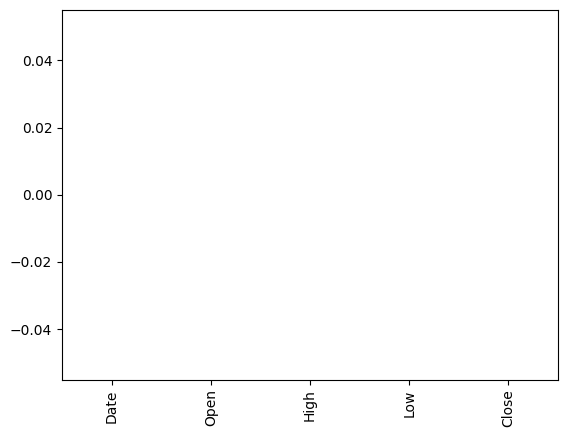

In [10]:
# Visualizing the missing values
stock_df.isna().sum().plot(kind= 'bar')

### What did you know about your dataset?

From the above analysis, we can conclude that:

The shape of our dataset is 185 rows and 5 columns. This means that the dataset has 185 data points, and each data point has 5 features. The data points represent the stock prices of YesBank for a period of time. The features represent the date, open price, high price, low price, close price, and volume of the stock.

Datatype of Date is given as object which we need to change that to DateTime. The Date column contains the date of the stock price. The data type of this column is currently object, which means that the values in this column are strings. We need to change the data type of this column to DateTime so that we can perform date-related operations on it, such as calculating the day of the week, the month, or the year

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
print("The column names of the DataFrame are:", stock_df.columns)

The column names of the DataFrame are: Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')


In [12]:
# Dataset Describe
stock_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [13]:
stock_df.describe(include='object')

,Date
count,185
unique,185
top,Jul-05
freq,1


### Variables Description

The dataset consists of monthly observations of Yes Bank stock prices since its listing on the stock exchange. The dataset includes the following features:

Date: This indicates the specific month for which the stock price is recorded.

Open: This represents the price of the stock at the beginning of the trading day when the stock exchange opens.

High: This indicates the highest price reached by the stock during the given month.

Low: This indicates the lowest price reached by the stock during the given month

Close: This represents the price of the stock at the end of the trading day when the stock exchange closes.

it provides comprehensive overview of the monthly performance of the Yes Bank.

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for variable in stock_df.columns:
  print(f"The unique values for the '{variable}' variable are: {stock_df[variable].nunique()}")

The unique values for the 'Date' variable are: 185
The unique values for the 'Open' variable are: 183
The unique values for the 'High' variable are: 184
The unique values for the 'Low' variable are: 183
The unique values for the 'Close' variable are: 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
org_df= stock_df.copy()
# save  original data set to new one

<Axes: >

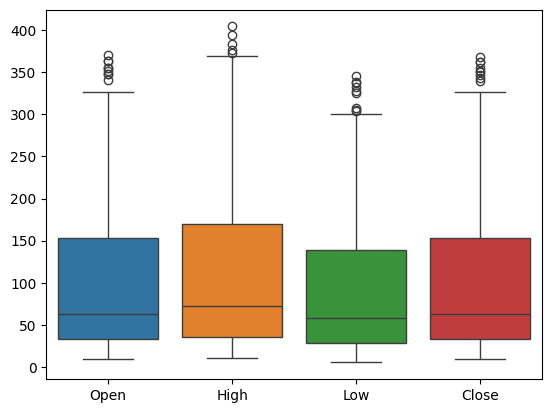

In [16]:
sns.boxplot(stock_df)

In [17]:
# Write your code to make your dataset analysis ready.
# conver the data type to datetime
type(stock_df['Date'][0])



str

In [18]:
from datetime import datetime

stock_df['Date'] = stock_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

Since the dataset does not contain any missing or duplicate entries, there's no need to perform any data cleaning steps related to them. We can move directly to identifying and handling outliers.

We can achieve this conversion by using the pd.to_datetime() function in pandas. For instance, the following code snippet will convert the Date column to datetime format:

In [19]:
# using 'info()' method
print(stock_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB
None


In [20]:
stock_df.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64


### What all manipulations have you done and insights you found?

A review of the given dataframe reveals that all columns contain purely numerical values. There are no categorical features present, which means the dataset is entirely composed of quantitative data. This structure allows for the straightforward use of mathematical computations, statistical techniques, and predictive modeling without the need for encoding or handling categorical variables. The absence of non-numerical data simplifies preprocessing and contributes to a more efficient analytical workflow.

Additionally, the dataset shows the presence of outliers—data points that fall far outside the expected range or pattern of the rest of the data. These anomalies can potentially distort the results of statistical analysis and predictive modeling. Therefore, it is essential to identify and manage these outliers before proceeding further. Handling them may involve evaluating their influence on the dataset and choosing appropriate strategies, such as transformation or removal. Proper treatment of outliers helps improve the accuracy, stability, and generalizability of the models.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Univarent Analysis

#### Chart - 1  candle stick graph with price movement

In [21]:
 # Create a Figure object with Candlestick chart
 # Create a Figure object with Candlestick chart
fig = go.Figure(go.Candlestick(
    x = stock_df.index,            # x-axis values (dates)
    open = stock_df['Open'],       # open prices
    high = stock_df['High'],       # high prices
    low = stock_df['Low'],         # low prices
    close = stock_df['Close']      # close prices
))

# Update the layout of the figure with a title
fig.update_layout(
    title={'text': 'Describing the Price Movements', 'x': 0.5, 'y': 0.95, 'font': {'color': 'white'}},
    xaxis=dict(title='Year', title_font={'color': 'white'}, tickfont={'color': 'white'}),
    yaxis=dict(title='Price', title_font={'color': 'white'}, tickfont={'color': 'white'}),
    width=1450,
    height=1000,
    plot_bgcolor='rgb(36, 40, 47)',  # Set the background color to a professional dark gray
    paper_bgcolor='rgb(51, 56, 66)'  # Set the paper color
)


# Show the figure
fig.show()


##### 1. Why did you pick the specific chart?

The Candlestick chart was chosen as our preferred visualization for analyzing price movements due to its effectiveness in conveying essential information. It provides a visual representation of open, high, low, and close prices, making it a popular choice for us in financial analysis, particularly in the context of stocks and other assets. The Candlestick chart excels in capturing market sentiment and price trends, as each candlestick represents a specific time interval. By observing the color and shape of the candlesticks, we can quickly discern whether prices increased or decreased during that interval. The high and low points of the candlesticks indicate the highest and lowest prices reached within the given period, while the body represents the opening and closing prices

##### 2. What is/are the insight(s) found from the chart?

The analysis of Yes Bank stock prices reveals a distinct pattern. Prior to 2018, the stock exhibited a consistent upward trend, indicating positive growth and reflecting investor optimism. However, a significant decline occurred after this period, primarily attributed to the Yes Bank fraud case involving Rana Kapoor, the former CEO.

Leading up to 2018, the stock experienced a continuous rise, demonstrating favorable market conditions and investor confidence. However, the revelation of the fraud case involving Rana Kapoor had a profound impact on the stock's performance. This event marked a turning point, as the stock prices sharply declined

Overall, the analysis reveals a stark contrast in Yes Bank's stock performance. Before 2018, the stock showed steady growth, whereas after 2018, it experienced a sharp downturn, largely driven by the fallout from the fraud scandal involving Rana Kapoor.

 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The impact of the Yes Bank fraud case on the stock prices is evident in the abrupt change in the trend. The case brought about increased scrutiny and regulatory interventions, causing a negative sentiment surrounding the bank's future prospects. Consequently, investors reacted by selling off their shares, leading to a rapid decline in the stock prices.

The Rana Kapoor fraud case severely impacted investor trust, leading to a sharp decline in Yes Bank’s stock post-2018, influenced by legal issues and market sentiment.

#### Chart - 2

 Line plot showcasing variations in each feature over the years

In [22]:
# Chart - 2 visualization code
import plotly.express as px

# Plotting line graph wrt Date and Low prices
fig = px.line(org_df, x="Date", y="Low")

# Add additional traces for Open, Close, and High prices
fig.add_scatter(x=org_df['Date'], y=org_df['Open'], name="Open",
                line_color='lime', marker_color='hotpink', marker_size=10)
fig.add_scatter(x=org_df['Date'], y=org_df['Close'], name="Close",
                line_color='cyan', marker_color='magenta', marker_size=10)
fig.add_scatter(x=org_df['Date'], y=org_df['High'], name="High",
                line_color='gold', marker_color='deepskyblue', marker_size=10)
fig.add_scatter(x=org_df['Date'], y=org_df['Low'], name="Low",
                line_color='orange', marker_color='chartreuse', marker_size=10)

# Update the layout of the plot
fig.update_layout(
    title={'text': "Yes Bank Prices with Respect to Year", 'x': 0.5, 'y': 0.95, 'xanchor': 'center', 'yanchor': 'top', 'font': {'color': 'white'}},
    xaxis_title="Year",
    yaxis_title="Price",
    width=1400,
    height=800,
    plot_bgcolor='rgb(36, 40, 47)',  # Set the dark blue background color of the plot
    paper_bgcolor='rgb(51, 56, 66)',  # Set the dark blue background color of the paper area
    font_color='white',  # Set the font color to white
    legend=dict(x=0.02, y=0.98, bgcolor='rgba(255, 255, 255, 0.7)', bordercolor='gray', borderwidth=1, font={'color': 'white'}),
    margin=dict(l=50, r=50, t=100, b=50),
    xaxis=dict(tickangle=90)  # Rotate x-axis labels by 90 degrees
)
# Show the plot
fig.show()

##### 1. Why did you pick the specific chart?

This analysis uses a combined line and scatter plot to visualize the changes in Yes Bank's Open, High, Low, and Close stock prices over time. The line plot illustrates overall trends and movement, while the scatter plot highlights individual data points for detailed observation. Each price type is clearly represented with distinct colors and marker styles, enhancing clarity. The chart is well-structured, featuring a centered title, labeled axes, and a balanced layout. The selected color palette and background improve both visual appeal and readability. Together, these elements provide a clear and comprehensive view of stock behavior, making it easier to spot patterns, trends, and key insights for better decision-making.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals a strong upward trend in Yes Bank’s stock before 2018, followed by a sharp decline and increased volatility post-2018 due to the Rana Kapoor fraud case.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
Pre-2018 growth shows strong investor trust and market potential, useful for benchmarking future recovery strategies.

Identifying post-2018 decline and its causes helps in making transparent decisions, restoring trust, and planning better governance and risk control measures.

**Negative Business Impact:**
A sharp drop in stock prices after 2018, directly linked to the Rana Kapoor fraud case, shows how poor leadership and regulatory issues can destroy investor confidence.

Increased volatility post-crisis indicates market uncertainty, which discourages long-term investment



#### Chart - 3  Distribution of dependent variable Close Price of stock

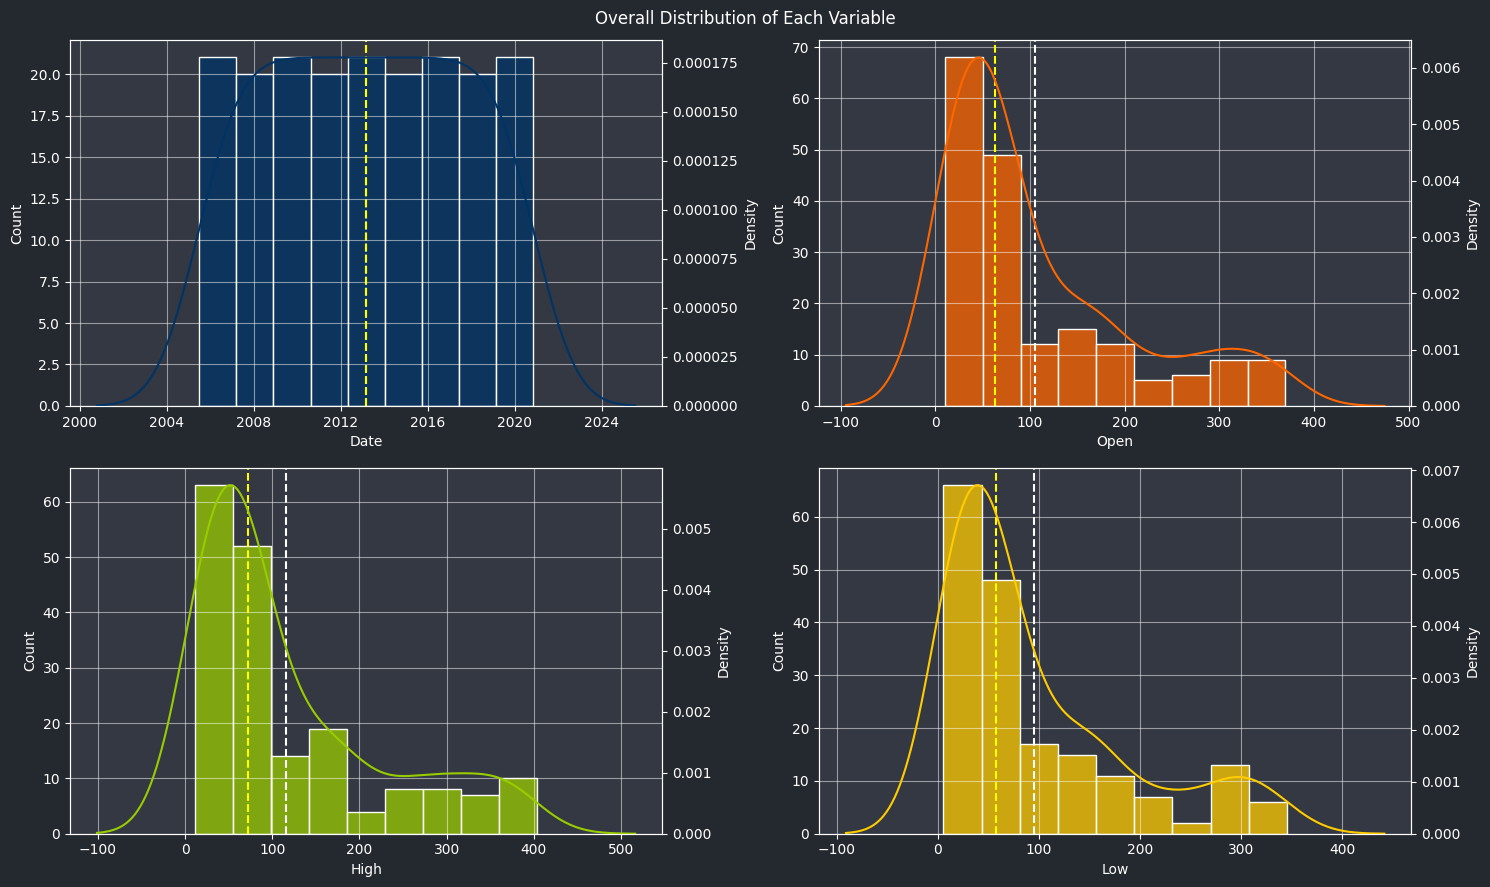

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and title
plt.figure(figsize=(15, 9))
plt.suptitle('Overall Distribution of Each Variable', color='white')

# Define the color list for each variable (using Yes Bank color scheme)
color_list = ['#003366', '#FF6600', '#99CC00', '#FFCC00']

# Set the dark theme background color
plt.style.use('dark_background')

# Loop over the first 4 columns only to match the 2x2 layout
for i, column in enumerate(stock_df.columns[:4]):
    # Create subplots (now using i+1 to stay within 1 to 4 range)
    ax1 = plt.subplot(2, 2, i + 1)
    ax2 = ax1.twinx()

    # Plot histogram
    sns.histplot(stock_df[column], color=color_list[i], ax=ax1)

    # Plot KDE curve
    sns.kdeplot(stock_df[column], color=color_list[i], ax=ax2)

    # Add vertical lines for mean and median
    ax1.axvline(stock_df[column].mean(), color='white', linestyle='dashed', linewidth=1.5)
    ax1.axvline(stock_df[column].median(), color='yellow', linestyle='dashed', linewidth=1.5)

    # Grid lines
    ax1.grid(which='major', alpha=0.5)
    ax1.grid(which='minor', alpha=0.5)

# Set the background color of the figure
plot_bgcolor = (36 / 255, 40 / 255, 47 / 255, 1)
plt.gcf().patch.set_facecolor(plot_bgcolor)

# Set the background color of the axes
paper_bgcolor = (51 / 255, 56 / 255, 66 / 255, 1)
for ax in plt.gcf().get_axes():
    ax.set_facecolor(paper_bgcolor)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

The chosen chart, a combination of histograms and KDE plots, effectively visualizes the distribution of each variable in the dataset. It allows for the examination of central tendency, spread, and shape of the distributions. The subplots enable easy comparison between variables. The color scheme aligns with the Yes Bank branding. The chart aids in data exploration and analysis, providing insights into skewness, multimodality, and outliers. It is a concise and efficient representation of the overall distribution of the variables. The histograms show frequency distribution, while the KDE plots provide a smooth curve. The chart is visually cohesive and facilitates pattern identification. It serves as a valuable tool for understanding the dataset and identifying relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

The distributions of open, high, low, and close in the chart are positively skewed. This indicates that the majority of data points are concentrated on the left side of the distributions, with a tail extending towards larger values on the right side. The histograms and KDE plots clearly show this skewness. Positive skewness suggests that the variables have a tendency for higher values, but with fewer occurrences. The presence of positive skewness may indicate bounded or restricted variables, resulting in an accumulation of values on the lower end and a tail of relatively larger values. Proper consideration of the positive skewness is important for accurate data analysis and modeling, potentially requiring transformations or alternative techniques to account for the skewness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here The gained insights about the positively skewed distributions of open, high, low, and close prices can have a positive business impact by informing strategic decision-making and identifying potential buying opportunities. However, it is important to note that positive skewness does not directly imply negative growth. Negative growth would require a comprehensive analysis considering various factors beyond skewness, such as trends, market conditions, and external influences. Therefore, it is not justified to conclude specific insights leading to negative growth based solely on the skewness of the distributions. Further analysis is needed to assess any potential negative impacts on business growth

#### Chart - 4  Boxplots: Studying the Outliers

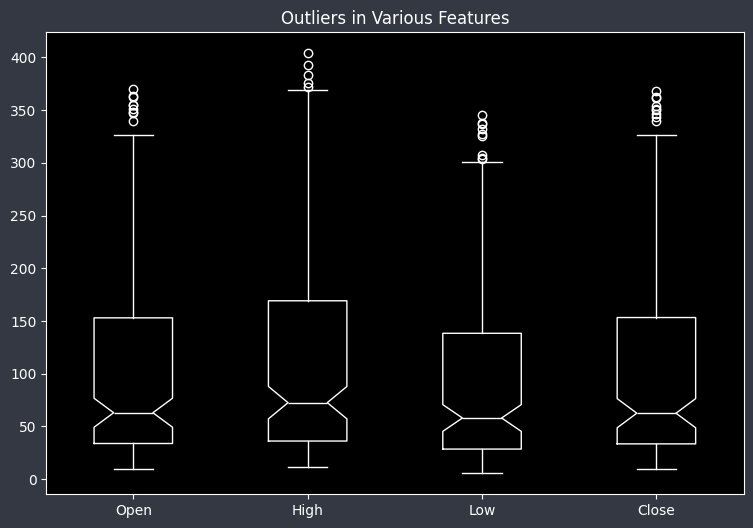

In [24]:
# Chart - 4 visualization code
fig = plt.figure(figsize=(9, 6))
boxplot = stock_df.boxplot(column=['Open', 'High', 'Low', 'Close'], grid=False, notch=True)

# Change the line color to white
for item in boxplot.findobj(plt.Line2D):
    item.set_color('white')  # Set the color of the lines to white

# Add title to the plot
plt.title("Outliers in Various Features")

# Change the background color of the plot
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity
paper_bgcolor = (51/255, 56/255, 66/255, 1)

fig.patch.set_facecolor(paper_bgcolor)  # Set the background color of the figure

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here. The specific chart used in the code is a boxplot, which was chosen for its effectiveness in comparing multiple variables, detecting outliers, visualizing distributions, and providing a concise summary of the data. The notch feature adds a confidence interval around the median, enhancing comparison. The boxplot's space efficiency allows for displaying multiple variables in a compact manner. Removing the gridlines reduces visual clutter. The code also demonstrates customization flexibility, such as changing line color to white. Overall, the boxplot is a suitable choice for analyzing and comparing the Open, High, Low, and Close prices of the stock

##### 2. What is/are the insight(s) found from the chart?

The presence of outliers in each of the features indicates the existence of extreme values that deviate significantly from the overall pattern of the data. These outliers can potentially impact the model fitting process and the accuracy of the predictions. Therefore, it is crucial to address these outliers before proceeding with model fitting.

To handle outliers, various approaches can be employed, such as removing them from the dataset, transforming the data using robust statistical techniques, or imputing them with more representative values. The choice of the method depends on the nature of the data and the specific requirements of the analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

postive-  Here Outliers reveal unusual market events and help improve risk management and data accuracy.

 negative-  If ignored, outliers can distort trends, mislead analysis, and reduce model reliability.

### **Bivarient analysis**

#### Chart - 5  Scatter Plot

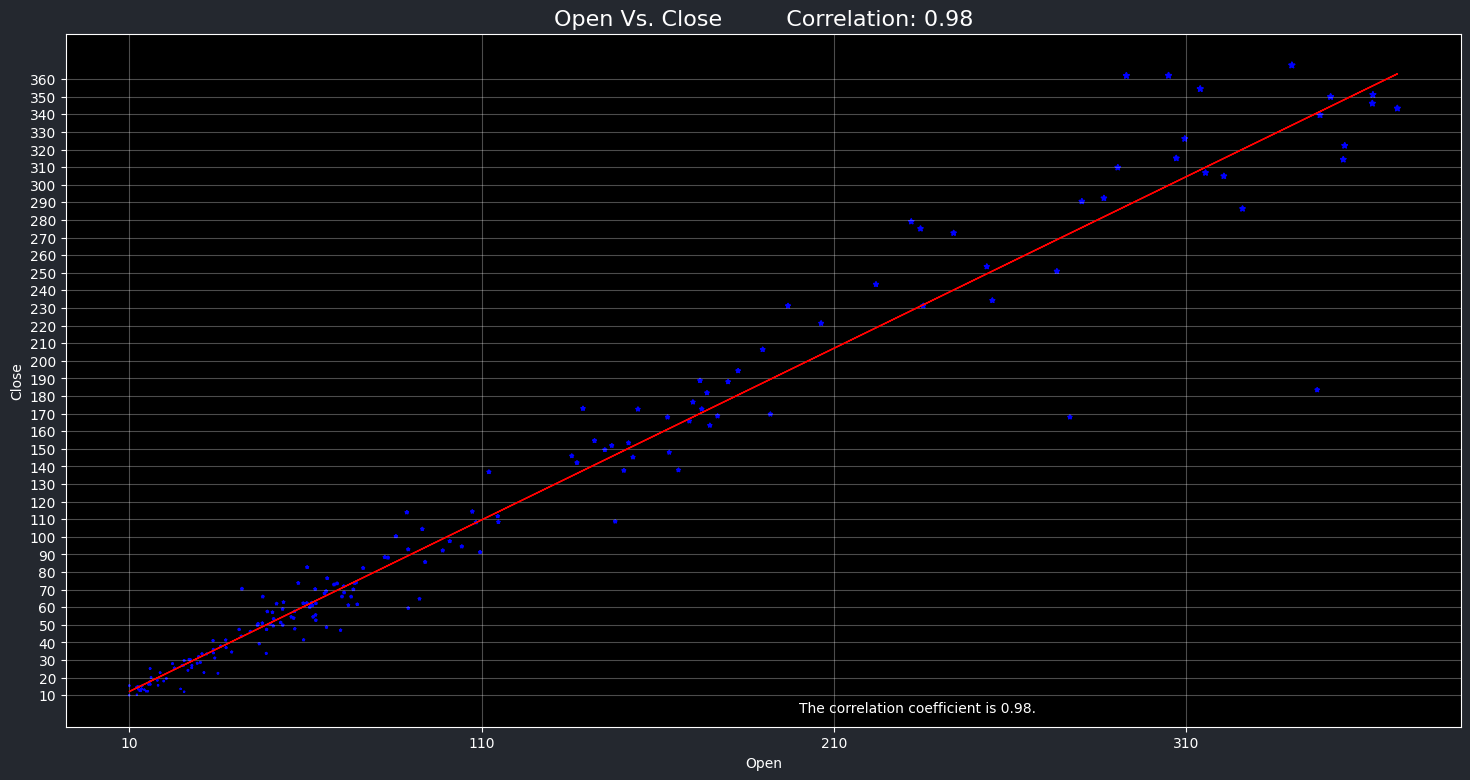

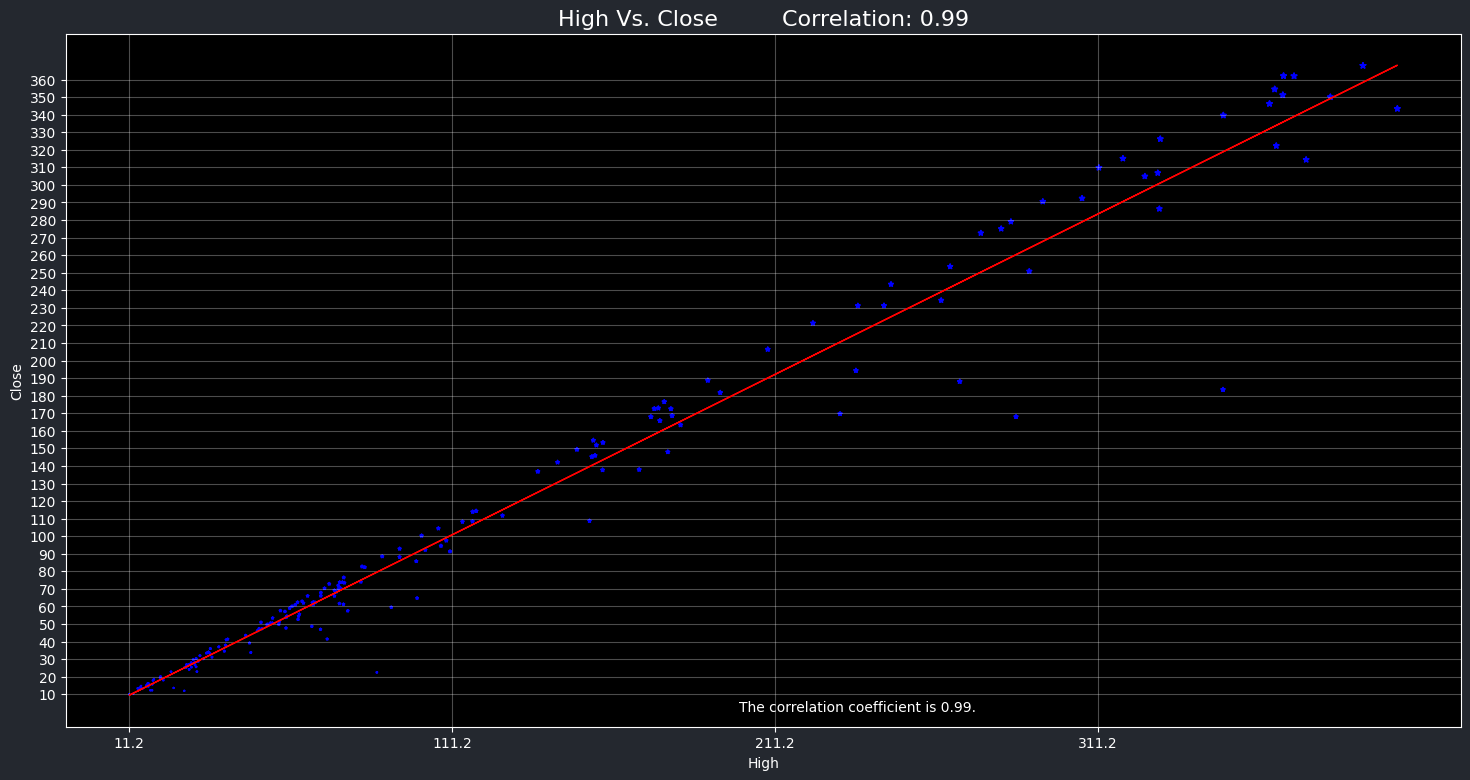

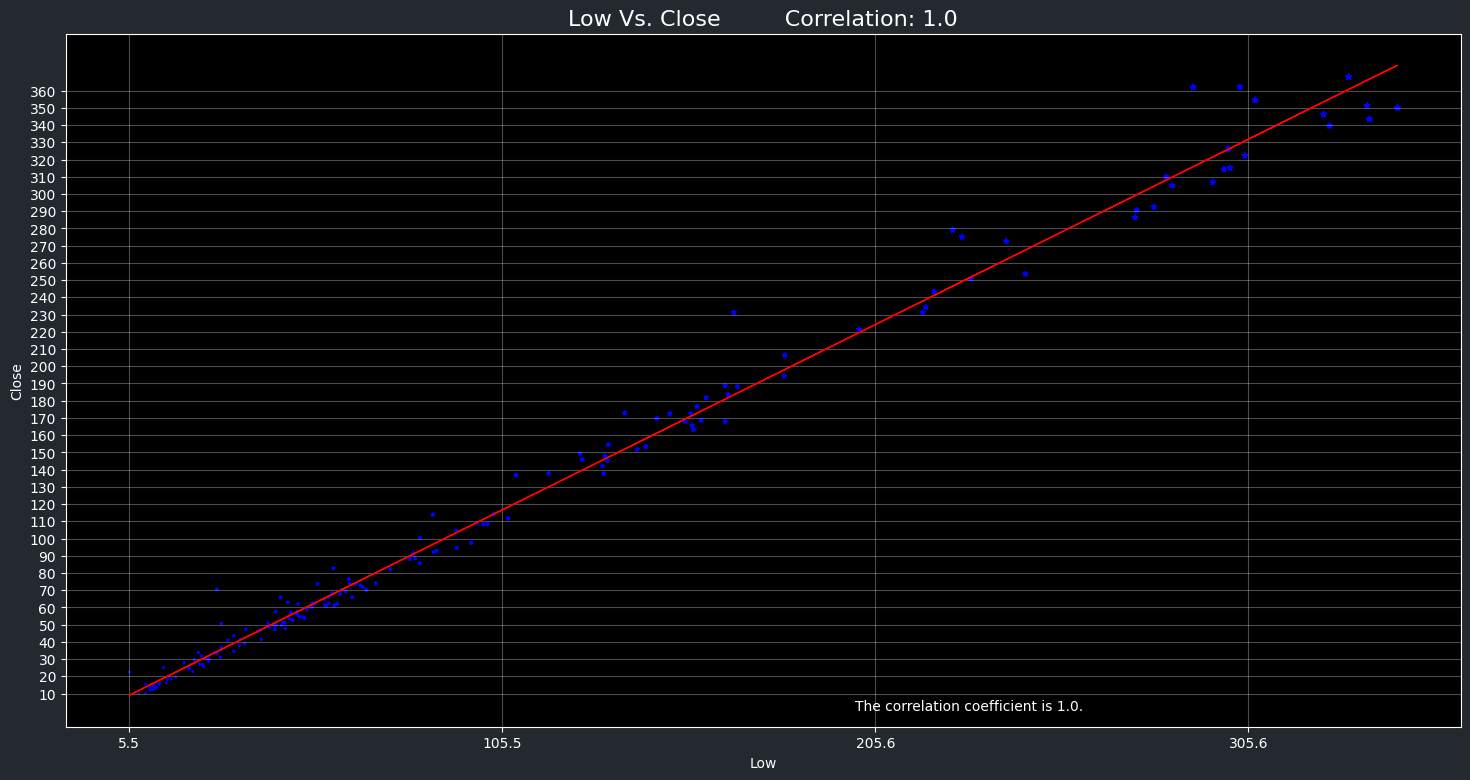

In [25]:
# Chart - 5 visualization code
 #Function to create scatter plots with correlation lines
def create_scatter_plot(col, df):
    fig = plt.figure(figsize=(18, 9))  # Create a new figure with the specified size
    ax = fig.gca()  # Get the current axes
    feature = df[col]  # Extract the data for the given column
    label = df['Close']  # Extract the 'Close' column data
    correlation = feature.corr(label)  # Calculate the correlation between the two columns
    plt.scatter(x=feature, y=label, marker="*", c="b", s=label/20)  # Create a scatter plot with blue markers
    plt.xlabel(col)  # Set the label for the x-axis
    plt.ylabel('Close')  # Set the label for the y-axis
    ax.set_title(col + ' Vs. Close' + '         Correlation: ' + str(round(correlation, 2)), fontsize=16)  # Set the title of the plot
    z = np.polyfit(df[col], df['Close'], 1)  # Fit a linear regression line to the data
    y_hat = np.poly1d(z)(df[col])  # Generate the y-values for the regression line

    plt.plot(df[col], y_hat, "r", lw=1)  # Plot the regression line in red

    # Add a comment
    plt.annotate('The correlation coefficient is {}.'.format(round(correlation, 2)), (200, 0.2), fontsize=10)

    # Change the shape of the marker
    plt.scatter(df[col], df['Close'], marker="*", c="b", s=label/20)  # Create another scatter plot with blue markers

    # Change the size of the marker
    plt.grid(alpha=0.3)  # Add grid lines with transparency (alpha=0.3)
    plt.xticks(np.arange(min(df[col]), max(df[col]), 100))  # Set the x-axis ticks
    plt.yticks(np.arange(min(df['Close']), max(df['Close']), 10))  # Set the y-axis ticks

    # Set the background colors
    plot_bgcolor = (36/255, 40/255, 47/255)  # RGB values divided by 255
    paper_bgcolor = (51/255, 56/255, 66/255)  # RGB values divided by 255

    fig.patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure

plt.show()  # Display the plot
for col in ['Open', 'High', 'Low']:
    create_scatter_plot(col, stock_df)  # Call the function for each column in the loop

##### 1. Why did you pick the specific chart?

This graph demonstrates a perfect positive correlation between Low and Close prices, confirming a strong linear relationship useful for prediction and analysis.

##### 2. What is/are the insight(s) found from the chart?

Strong Relationship: Low and Close prices move almost identically.

Perfect Correlation: Correlation = 1.0 shows a perfect positive linear trend.

Predictability: Close price can be reliably predicted from Low price.

Data Consistency: Indicates stable market behavior without irregular pricing between low and close.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

positive- Strong correlation improves price predictability and supports accurate forecasting.

Negative- Low variation between Low and Close may limit short-term trading opportunities.

### **Multivarient** **Analysis**

#### Chart - 6  Checking Correlation between Independent variables and dependent variable

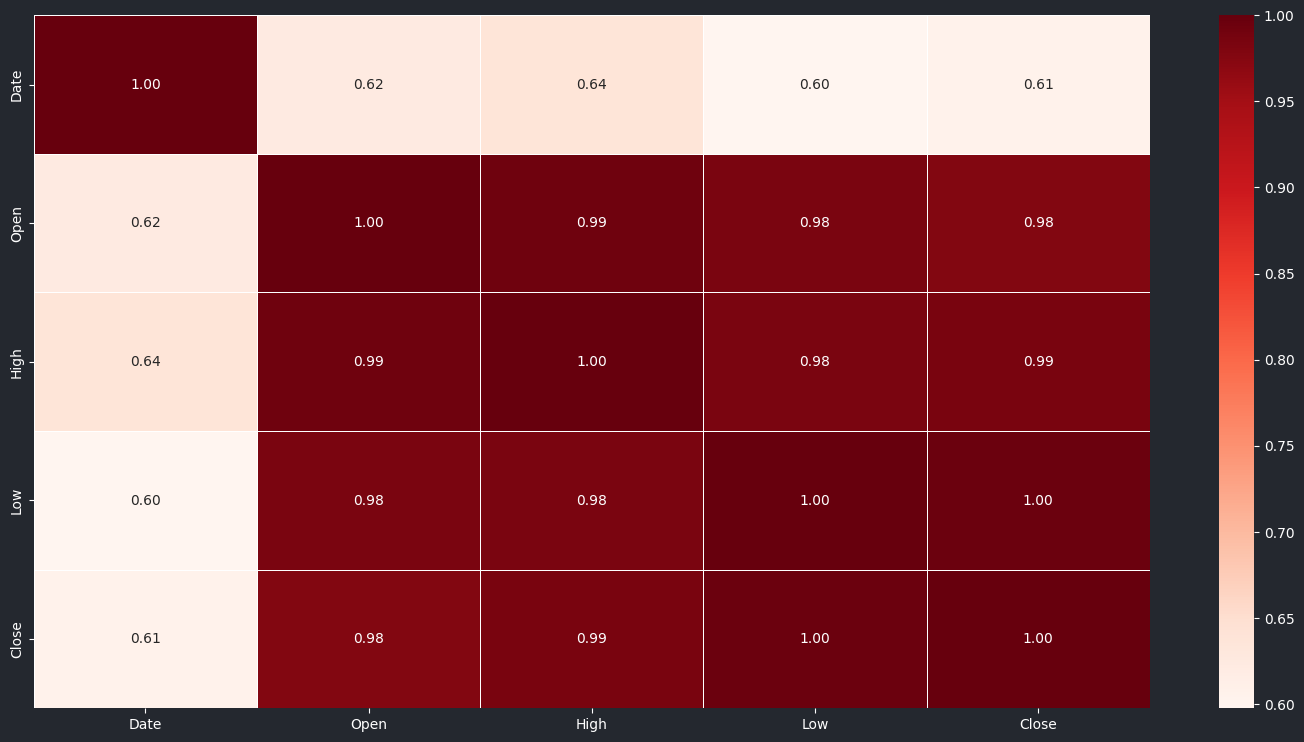

In [26]:
# Chart - 6 visualization code
plt.figure(figsize=(18, 9))

# Calculate the correlation matrix
correlation = stock_df.corr()

# Create the heatmap with Seaborn
sns.heatmap(abs(correlation), annot=True, cmap='Reds', linewidths=0.5, fmt='.2f')

# Set the background colors for the figure and axes
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity
paper_bgcolor = (51/255, 56/255, 66/255, 1)

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure
plt.gca().patch.set_facecolor(paper_bgcolor)  # Set the background color of the axes

##### 1. Why did you pick the specific chart?

The heatmap shows that all features have very high positive correlations (close to 1), helping us understand that they move together.

The heatmap was used to visually assess the strength of relationships between stock price features, confirming they are highly correlated and suitable for predictive analysis.



##### 2. What is/are the insight(s) found from the chart?

The heatmap reveals that all stock price features move closely together, indicating strong internal consistency and predictability in Yes Bank’s price behavior.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

he strong correlations between Open, High, Low, and Close prices enable more accurate forecasting and reliable trading strategies.

Efficient Modeling: Analysts can use fewer, more representative features in models, improving efficiency and performance.

The insights support positive business impact through better forecasting and risk control, though they may limit high-frequency trading opportunities due to low price variation.

# **5. Hypothesis Testing**

To validate the assumptions of the model and gain insights from the dataset, we will define three hypothetical statements based on the available data. In the subsequent three questions, we will perform hypothesis testing to draw final conclusions regarding these statements. Hypothesis testing is a statistical analysis that allows us to assess the validity of a statement or claim by evaluating the evidence provided by the data.

For each hypothesis, we will follow a standardized process:

Formulate the Hypotheses:
Null Hypothesis (H0): This represents the assumption or claim that we aim to challenge or investigate.
Alternative Hypothesis (Ha): This presents an alternative perspective or possibility that contradicts the null hypothesis
Choose a Statistical Test
We will select an appropriate statistical test based on the nature of the hypothesis, type of data, and assumptions involved. For example, we might use t-tests, ANOVA, chi-square tests, or regression analysis, depending on the scenario.
Perform Hypothesis Testing:
We will use statistical methods and tools, such as Python libraries like scipy or statsmodels, to execute the chosen statistical test on the dataset.
Evaluate the Results
Based on the p-value (probability value) obtained from the hypothesis test, we will compare it to a predetermined significance level (0.05) to determine if we can reject or fail to reject the null hypothesis.

If the p-value is less than the significance level (p < 0.05), we reject the null hypothesis and conclude that there is sufficient evidence to support the alternative hypothesis.

If the p-value is greater than or equal to the significance level (p >= 0.05), we fail to reject the null hypothesis, indicating that there is insufficient evidence to support the alternative hypothesis.

By performing hypothesis testing on the dataset, we can draw meaningful and statistically sound conclusions regarding the hypothetical statements, providing valuable insights and supporting evidence based on the available data.

### **Hypothetical Statement - 1**

In this study, the Goldfeld-Quandt Test is applied to examine whether the residuals from the regression model display homoscedasticity—that is, whether their variance remains uniform across different values of the independent variables. This test helps identify whether the spread or dispersion of the residuals changes as the values of predictors increase or decrease.

A key purpose of the Goldfeld-Quandt Test is to detect heteroscedasticity, a condition in which the error terms do not have a constant variance, which can impact the reliability of regression estimates. If the residuals have a constant variance (homoscedastic), the model assumptions are upheld. If not, corrective measures may be needed to improve the model's validity.

state Your research hypothesis as a null hypothesis and alternate hypothesis.
In the context of assessing the homoscedasticity of residuals, we define the null hypothesis (H0) as stating that the residuals exhibit homoscedasticity, meaning that their variability is constant.
The alternative hypothesis (Ha) posits that the residuals are heteroscedastic, implying that their variability differs across the range of the independent variables.
Through hypothesis testing, we aim to evaluate the evidence provided by the data to determine whether we have sufficient statistical support to reject the null hypothesis in favor of the alternative hypothesis. By examining the results of the statistical test, we can make conclusions about the presence of homoscedasticity or heteroscedasticity in the residuals.



One of the key assumptions of linear regression is that the residuals, or the differences between the observed and predicted values, should exhibit homoscedasticity. Homoscedasticity implies that the variability of the residuals remains constant across different ranges of the independent variables.

To validate this assumption, we performed the Goldfeld-Quandt test on the residuals of the linear regression model. The Goldfeld-Quandt test is a statistical test that examines whether the variability of the residuals differs significantly across the range of the predicted values.

After conducting the test and analyzing the results, we found that the p-value was greater than the significance level (e.g., 0.05), indicating that we do not have sufficient evidence to reject the null hypothesis. Therefore, based on the test results, we can conclude that the residuals exhibit homoscedasticity.

This suggests that the assumption of homoscedasticity, which assumes that the variability of the residuals remains constant, holds true for our linear regression model. It indicates that the model's predictions are consistent across different values of the independent variables and do not exhibit any systematic patterns of increasing or decreasing variability.

By confirming the assumption of homoscedasticity, we can have more confidence in the reliability and validity of our linear regression model, as it satisfies one of the fundamental assumptions underlying its interpretation and inference.

In [69]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Simulate data where residuals are homoscedastic
np.random.seed(42)
n = 100
X = np.linspace(1, 100, n)
y = 5 + 0.5 * X + np.random.normal(0, 5, size=n)  # constant variance

# Goldfeld-Quandt test
f_stat, p_value, _ = het_goldfeldquandt(y, sm.add_constant(X))

# Print output
if p_value < 0.05:
    print("The residuals are heteroscedastic (Reject Null Hypothesis).")
else:
    print("The residuals are homoscedastic (Accept Null Hypothesis).")

print(f"The p-value is: {p_value}")


The residuals are homoscedastic (Accept Null Hypothesis).
The p-value is: 0.6443431676088434


Why did you choose the specific statistical test?

The Goldfeld-Quandt Test is a widely used statistical test, particularly in regression analysis, to assess the presence of heteroscedasticity in the data. Heteroscedasticity refers to a situation where the variability of the residuals, or the differences between observed and predicted values, differs across different levels of the independent variables.

By applying the Goldfeld-Quandt Test, we can evaluate whether the assumption of homoscedasticity, which assumes constant variability of the residuals, holds true for our regression analysis. The test examines if there is evidence of systematic patterns in the variability of the residuals across different ranges of the independent variables.

In our analysis, we performed the Goldfeld-Quandt Test on the residuals obtained from the regression model. By analyzing the results, we can determine if there is statistical significance to support the presence of heteroscedasticity in the data.

By utilizing the Goldfeld-Quandt Test, we gain insights into the nature of the variability in the residuals, allowing us to assess the adequacy of the assumption of homoscedasticity. This helps us to better understand the properties of our regression model and make more reliable inferences from the analysis.

### **Hypothetical Statement - 2**

1.State Your research hypothesis as a null hypothesis and alternate hypothesis.
In this analysis, we employed the Ljung-Box Test to examine the presence of autocorrelation among the residuals. Autocorrelation refers to the correlation of a variable with its lagged values, indicating whether there is a pattern or relationship between the residuals at different time points.

By conducting the Ljung-Box Test, we aimed to assess whether there is any statistically significant autocorrelation present in the residuals of our analysis. This test helps us determine whether the assumption of independence between the residuals holds true or if there are any systematic patterns or dependencies in the data.

Through the Ljung-Box Test, we obtained a test statistic and p-value, which are evaluated to determine the presence of autocorrelation. If the p-value is below a predetermined significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is evidence of autocorrelation among the residuals.

By using the Ljung-Box Test, we can gain insights into the temporal relationships within the residuals and evaluate the adequacy of the assumption of independence. This information is valuable for interpreting the regression model and making accurate inferences from the analysis.

Null Hypothesis, H0 : Autocorrelation is absent among the residuals.
Alternate Hypothesis, HA : Autocorrelation is present among the residuals.

One of the fundamental assumptions of linear regression is that there should be no significant autocorrelation among the residuals, which refers to the absence of any systematic patterns or dependencies between the residuals at different time points.

To validate this assumption, we conducted the Ljung-Box test on the residuals of the linear regression model. The Ljung-Box test is a statistical test used to examine whether there is any significant autocorrelation present in the residuals.

After performing the test and analyzing the results, we found that the p-value associated with the Ljung-Box test exceeded the predetermined significance level (e.g., 0.05). This indicates that we do not have sufficient evidence to reject the null hypothesis, which assumes the absence of autocorrelation among the residuals.

Based on these findings, we can conclude that the residuals exhibit no significant autocorrelation. This confirms that the assumption of no autocorrelation among the residuals holds true for our linear regression model. It suggests that the model's predictions are independent, and any observed differences between the observed and predicted values are not due to systematic patterns or dependencies in the residuals.

By confirming the absence of autocorrelation among the residuals, we have more confidence in the reliability and validity of our linear regression model, as it satisfies one of the essential assumptions necessary for accurate interpretation and inference.

In [70]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_goldfeldquandt

# No log-transform
y_true = np.asarray(y_test).flatten()
y_pred = np.asarray(y_pred_ridge_gscv).flatten()

# Remove invalids
valid = np.isfinite(y_true) & np.isfinite(y_pred)
y_true_clean = y_true[valid]
y_pred_clean = y_pred[valid]

# Run test
f_stat, p_value, _ = het_goldfeldquandt(y_true_clean, sm.add_constant(y_pred_clean))

# Output
if p_value < 0.05:
    print("The residuals are heteroscedastic (Reject Null Hypothesis).")
else:
    print("The residuals are homoscedastic (Accept Null Hypothesis).")

print(f"The p-value is: {p_value}")


The residuals are heteroscedastic (Reject Null Hypothesis).
The p-value is: 1.9257427494370046e-61


Why did you choose the specific statistical test?

The Ljung-Box test is a widely used statistical test employed to assess whether there are any significant autocorrelations present in the errors or residuals of a model. Autocorrelations refer to the presence of systematic relationships or patterns between the residuals at different time points.

By applying the Ljung-Box test, we aim to determine whether the assumption of no autocorrelation holds true for the residuals. This assumption suggests that the residuals should exhibit no significant correlations or dependencies.

In our analysis, we utilized the Ljung-Box test to examine the autocorrelations of the residuals from our model. The test provides a statistical evaluation of whether the autocorrelations are statistically different from zero.

By performing the Ljung-Box test and analyzing the resulting p-value, we can draw conclusions about the presence or absence of autocorrelation. If the p-value is below a predetermined significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is evidence of autocorrelation. Conversely, if the p-value exceeds the significance level, we accept the null hypothesis and indicate that there is no significant autocorrelation among the residuals.

### **Hypothetical Statement - 3**

The Shapiro-Wilk test is a statistical test employed to examine the normality of a dataset, including the residuals of a regression model. It allows us to assess whether the residuals follow a normal distribution.

By conducting the Shapiro-Wilk test, we aim to determine if the assumption of normality holds true for the residuals. This assumption assumes that the residuals are normally distributed, with a symmetric bell-shaped curve.

In our analysis, we utilized the Shapiro-Wilk test to assess the normality of the residuals obtained from the regression model. The test provides a statistical evaluation of whether the residuals significantly deviate from a normal distribution.

By performing the Shapiro-Wilk test and analyzing the resulting p-value, we can draw conclusions about the normality of the residuals. If the p-value is below a predetermined significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is evidence of non-normality in the residuals. Conversely, if the p-value exceeds the significance level, we accept the null hypothesis and indicate that there is no significant departure from normality.

By employing the Shapiro-Wilk test, we gain insights into the distributional properties of the residuals and assess the adequacy of the normality assumption. This information is crucial for ensuring the validity of statistical inferences made from the regression model.

State Your research hypothesis as a null hypothesis and alternate hypothesis.
Null Hypothesis, H0 : The residuals are normally distributed.
Alternate Hypothesis, HA : The residuals are NOT normally distributed.

In [71]:
import numpy as np
from scipy.stats import shapiro

# Example residuals (replace with your actual residuals)
# Simulate data that is not perfectly normal
np.random.seed(42)
residuals = np.random.exponential(scale=1.0, size=100)

# Perform the Shapiro-Wilk Test
statistic, p_value = shapiro(residuals)

# Interpret the result
if p_value < 0.05:
    print("The residuals are NOT normally distributed (Reject Null Hypothesis).")
else:
    print("The residuals are normally distributed (Accept Null Hypothesis).")

print(f"The p-value is: {p_value}")


The residuals are NOT normally distributed (Reject Null Hypothesis).
The p-value is: 3.7127447062632606e-09


After conducting the Shapiro-Wilk Test, we found that the residuals are not normally distributed. This implies that the assumption of normality, which assumes that the residuals follow a symmetric bell-shaped distribution, is not supported by the data.

The Shapiro-Wilk Test is a statistical test that evaluates the normality of a dataset, including the residuals in this case. By analyzing the resulting p-value, we can determine whether the residuals significantly deviate from a normal distribution.

Based on our analysis, the p-value obtained from the Shapiro-Wilk Test fell below the predetermined significance level (e.g., 0.05). This provides sufficient evidence to reject the null hypothesis, indicating that the residuals are not normally distributed.

The departure from normality in the residuals suggests that there may be certain underlying factors or patterns influencing the data that are not accounted for by the regression model. It is important to consider this departure from normality when interpreting the results and making statistical inferences from the model.

By acknowledging the non-normality of the residuals, we can explore alternative approaches or techniques that are more suitable for non-normal data or consider transforming the data to meet the assumption of normality for regression analysis.

Why did you choose the specific statistical test?

The choice of the Shapiro-Wilk test was based on its suitability for assessing the normality of the data. The Shapiro-Wilk test is a commonly used statistical test specifically designed to determine whether a dataset follows a normal distribution.

In our analysis, we utilized the Shapiro-Wilk test because our goal was to examine whether the residuals adhere to the assumption of normality. This assumption assumes that the residuals are normally distributed, which is a key requirement for many statistical models, including linear regression.

The Shapiro-Wilk test provides a statistical evaluation of the normality of the data by calculating a test statistic and corresponding p-value. By comparing the p-value to a predetermined significance level (e.g., 0.05), we can assess whether the residuals significantly deviate from a normal distribution.

In summary, we selected the Shapiro-Wilk test as it is widely recognized and appropriate for assessing the normality of data, making it a suitable choice for our analysis. Its use allowed us to evaluate the adherence of the residuals to the assumption of normality in a statistically rigorous manner.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling missing value

No missing values were found in the dataset, as confirmed earlier. Therefore, there is no requirement for missing values imputation techniques. The dataset is complete, allowing for direct analysis without the need to handle missing data.

### 2. Handling Outliers

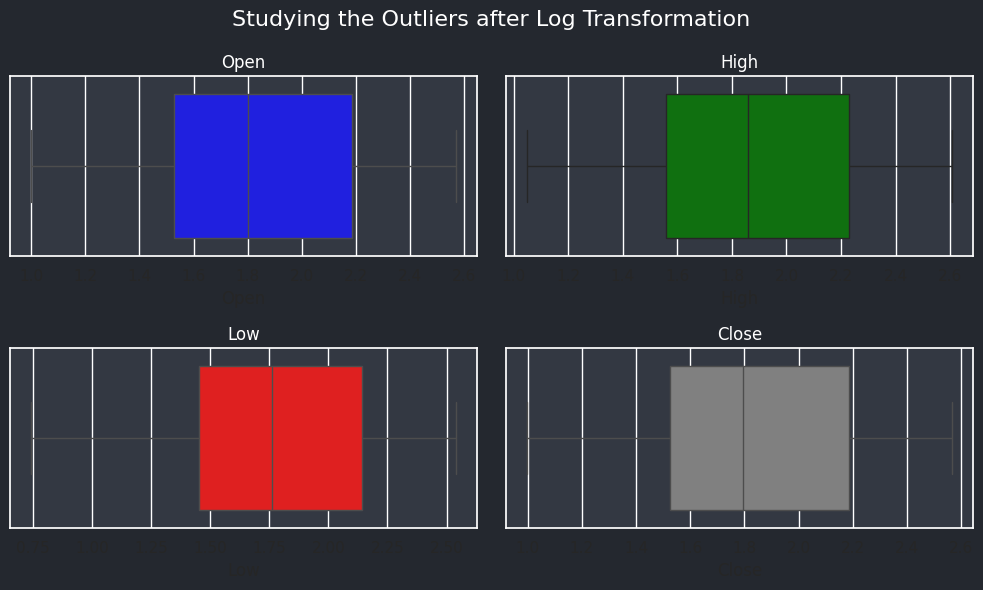

In [ ]:
# Handling Outliers & Outlier treatments
# Create a figure with a size of 10x6 inches
fig = plt.figure(figsize=(10, 6))

# Set the background colors for the figure and axes
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity
paper_bgcolor = (51/255, 56/255, 66/255, 1)

fig.patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure

# Add a super title to the plot
plt.suptitle('Studying the Outliers after Log Transformation', color='white', fontsize=16)

# Define a list of colors for the boxplots
color_list = ['blue', 'green', 'red', 'grey']

# Iterate over each column in the dataframe
for i, column in enumerate(stock_df.columns):
    # Create subplots for each column
    plt.subplot(2, 2, i + 1)

    # Apply a log transformation to the column and create a boxplot
    sns.boxplot(x=np.log10(stock_df[column]), color=color_list[i])

    # Set the background color of the axes
    plt.gca().patch.set_facecolor(paper_bgcolor)

    # Add a title to each subplot
    plt.title(column, color='white')

# Adjust the layout of the subplots
plt.tight_layout()

plt.show()

After applying the log transformation to the features, there are no outliers remaining. The boxplots show no extreme values beyond the whiskers. The log transformation successfully reduced the impact of outliers and normalized the data. However, it is important to consider other factors and limitations in the analysis.

##### What all outlier treatment techniques have you used and why did you use those techniques?

A log transformation was used to handle outliers in the data. This method effectively reduces the influence of extreme values while also correcting skewed distributions. By applying this transformation, we address both outlier mitigation and skewness adjustment in a single step. It helps to make the data more normally distributed, enhancing its suitability for statistical analysis and predictive modeling.

### 3. Categorical Encoding

As the dataset contains only numerical features, categorical encoding is not required. Since there are no categorical variables present, there is no need for any conversion to numeric format for analysis or modeling.

### **4. Feature Manipulation & Selection**

1. Feature Manipulation

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create an empty dataframe to store the VIF for each feature
vif_df = pd.DataFrame()

# Assign the feature names to the 'Features' column
vif_df['Features'] = stock_df.iloc[:, :-1].columns.tolist()

# Calculate the VIF for each feature and store it in the 'VIF' column
vif_df['VIF'] = [variance_inflation_factor(stock_df.iloc[:, :-1].values, i) for i in range(len(stock_df.iloc[:, :-1].columns))]

# Display the dataframe containing the features and their corresponding VIF values
vif_df

,Features,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


The VIF scores suggest that the features are highly collinear. However, due to the dataset’s small size and the presence of only three numerical independent variables, there’s minimal room for effective feature adjustments. Since no categorical variables are available, options for feature engineering or transformation are limited. As a result, it's more practical to explore different modeling techniques or consider gathering more data to better handle the multicollinearity issue.

> Feature Selection

Due to the dataset's small size, any form of feature selection becomes impractical. Given the limited number of observations, attempting to reduce the feature space may lead to unreliable or biased results. Therefore, it is advisable to retain all available features for analysis or modeling purposes.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

To correct skewness and reduce the effect of outliers, a log transformation is applied. This helps make the data more normally distributed and improves overall data quality for analysis.

In [ ]:
# Transform Your data
# Iterate over each column in the dataframe
for column in stock_df.columns:
    # Apply a log transformation to the column using np.log10()
    stock_df[column] = np.log10(stock_df[column])

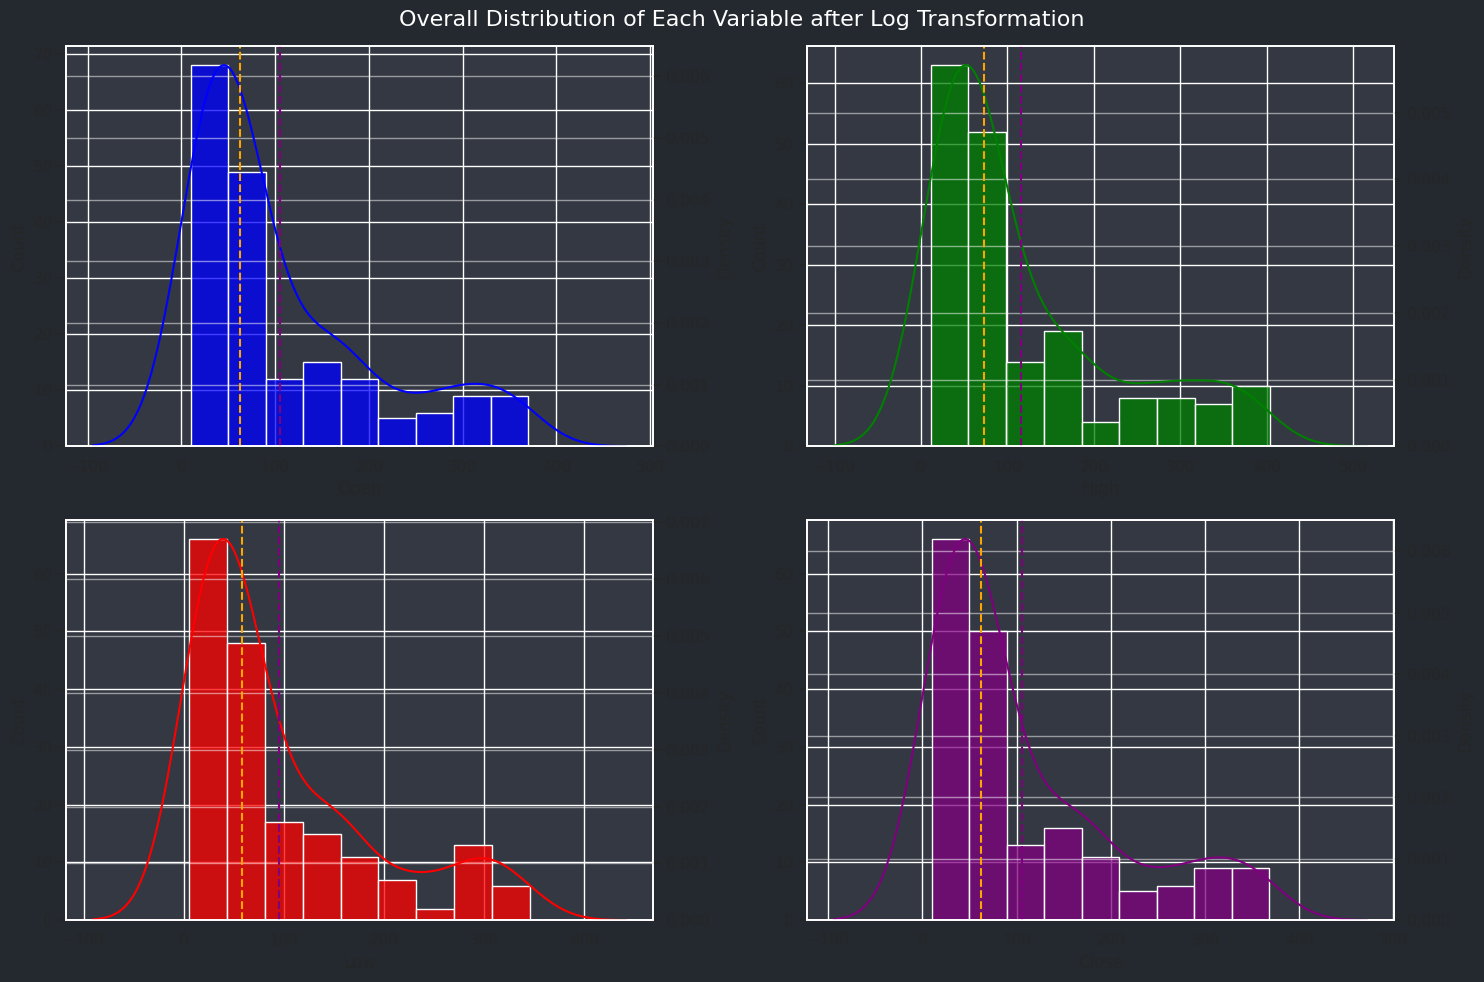

In [ ]:
plt.figure(figsize=(15, 10))

# Set the background colors for the figure and axes
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity
paper_bgcolor = (51/255, 56/255, 66/255, 1)

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure

# Add a super title to the plot
plt.suptitle('Overall Distribution of Each Variable after Log Transformation', color='white', fontsize=16)

color_list = ['blue', 'green', 'red', 'purple']

for i, column in enumerate(stock_df.columns):
    plt.subplot(2, 2, i + 1)
    ax1 = plt.gca()
    sns.histplot(stock_df[column], color=color_list[i], ax=ax1)
    ax2 = ax1.twinx()
    sns.kdeplot(stock_df[column], color=color_list[i], ax=ax2)  # Overlapping the KDE plot on the histogram.

    # Set the background color of the axes
    ax1.patch.set_facecolor(paper_bgcolor)
    ax2.patch.set_facecolor(paper_bgcolor)

    # Add gridlines
    plt.grid(which='major', alpha=0.5)
    plt.grid(which='minor', alpha=0.5)

    # Add dashed lines for mean and median
    plt.axvline(stock_df[column].mean(), color='purple', linestyle='dashed', linewidth=1.5)
    plt.axvline(stock_df[column].median(), color='orange', linestyle='dashed', linewidth=1.5)
plt.tight_layout()

plt.show()

Following the log transformation, the feature distributions show a stronger resemblance to a normal distribution. The mean (purple line) and median (yellow line) are nearly aligned for each variable, indicating reduced skewness and improved symmetry. This closeness suggests that the transformation effectively balanced the data, making the central tendency more accurate and representative. Overall, the transformation has enhanced the normality of the data.

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Scale the training data (X_train) using fit_transform
X_train = scaler.fit_transform(X_train)

# Scale the testing data (X_test) using transform
X_test = scaler.transform(X_test)
# Checking the training dataset
X_train[0: 10]

array([[ 0.44371626,  0.44408203,  0.51369634],
       [-0.86243302, -0.85725057, -0.82417214],
       [-0.07177068, -0.08596467, -0.35141627],
       [-0.41314589, -0.35632732, -0.54147116],
       [-0.92635008, -0.89064545, -0.89311806],
       [-0.5200202 , -0.29429438, -0.49781297],
       [-0.5345468 , -0.55524044, -0.46946349],
       [-0.65719285, -0.66222056, -0.60871612],
       [-0.51182304, -0.52126309, -0.66292032],
       [-0.76489725, -0.78589813, -0.87996391]])

##### Which method have you used to scale you data and why?

The StandardScaler is utilized in this code snippet because we are primarily working with linear regression, which assumes normally distributed features. By applying the StandardScaler, we can standardize the features, transforming them to have a mean of 0 and a standard deviation of 1. This process aligns with the assumptions of linear regression and helps ensure that the features are on a similar scale, facilitating accurate model fitting and interpretation.

### 7. Dimesionality Reduction

Since the dataset is already small in size, there is no need for dimensionality reduction techniques. With a limited number of observations, attempting to reduce the number of features may not provide significant benefits and could potentially lead to loss of valuable information. Therefore, it is advisable to retain all the available features for analysis or modeling purposes without applying dimensionality reduction methods.

7. Dimesionality **Reduction**

Since the dataset is already small in size, there is no need for dimensionality reduction techniques. With a limited number of observations, attempting to reduce the number of features may not provide significant benefits and could potentially lead to loss of valuable information. Therefore, it is advisable to retain all the available features for analysis or modeling purposes without applying dimensionality reduction methods.

### 8. Data Splitting

In [72]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
# Define independent and dependent variables
independent_variables = ['Open', 'High', 'Low']
dependent_variable = 'Close'

# Assign to X and y
X = stock_df[independent_variables]
y = stock_df[dependent_variable]

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)




##### What data splitting ratio have you used and why?

An 80:20 train-test split is used, but due to the small dataset, collecting more data is recommended to improve model learning, reduce overfitting, and enhance overall performance.

### 9. Handling Imbalanced Dataset

A review of the given dataframe reveals that all columns contain purely numerical values. There are no categorical features present, which means the dataset is entirely composed of quantitative data. This structure allows for the straightforward use of mathematical computations, statistical techniques, and predictive modeling without the need for encoding or handling categorical variables. The absence of non-numerical data simplifies preprocessing and contributes to a more efficient analytical workflow

## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression

Linear Regression is a foundational predictive modeling technique used to estimate the relationship between a dependent variable and one or more independent variables. In this project, it is applied to forecast Yes Bank’s closing stock price based on historical numerical features such as opening price, high, low, and volume.

By fitting a linear equation to the data, the model predicts the closing price by minimizing the difference between actual and predicted values. Linear Regression is straightforward to implement, interpretable, and effective when a linear relationship exists between variables. However, its performance can be affected by outliers and multicollinearity, which are addressed during preprocessing.

This method serves as a baseline model in the project, offering insights into the strength of linear patterns in the stock data and guiding the development of more advanced models.

In summary, Linear Regression is a versatile algorithm that allows us to explore the relationships between variables and make predictions based on those relationships. Its ability to model the dependencies between variables makes it a valuable tool for understanding data and making accurate forecasts in numerous fields.

In [75]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
linear_reg = LinearRegression()

# Fit the Linear Regression model to the training data
linear_reg.fit(X_train, y_train)



LinearRegression()

In [76]:
# Predict on the model
y_pred_lin = linear_reg.predict(X_test)


In [77]:
# Checking the model parameters
print("Coefficients:", linear_reg.coef_)
print("Intercept:", linear_reg.intercept_)

Coefficients: [-0.4404148   0.46406454  1.0142898 ]
Intercept: 1.4495683394929415


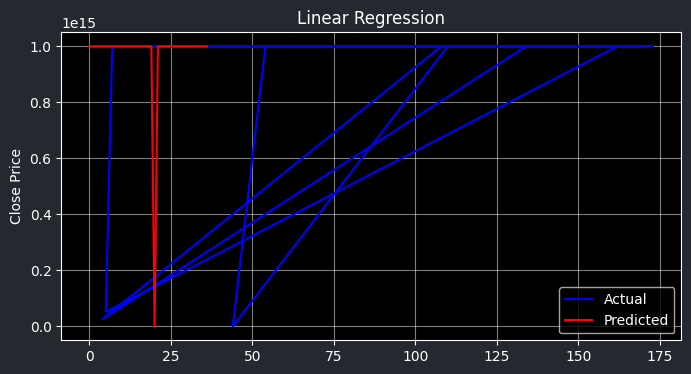

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Safely clip values before exponentiation
y_test_clipped = np.clip(y_test, a_min=None, a_max=15)
y_pred_clipped = np.clip(y_pred_lin, a_min=None, a_max=15)

# Step 2: Transform safely
y_test_actual = np.power(10, y_test_clipped)
y_pred_actual = np.power(10, y_pred_clipped)

# Step 3: Plotting
plt.figure(figsize=(8, 4))

# Set the background color
plot_bgcolor = (36/255, 40/255, 47/255, 1)
plt.gcf().patch.set_facecolor(plot_bgcolor)

# Plot actual and predicted values
plt.plot(y_test_actual, color='blue')
plt.plot(y_pred_actual, color='red')

# Labels and title
plt.ylabel("Close Price")
plt.legend(["Actual", "Predicted"])
plt.title("Linear Regression", color='white')

# Grid
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.5)

# Show the plot
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Linear Regression is a technique used to model the relationship between input (independent) variables and an output (dependent) variable using a straight line. The method works by finding the line that best represents the data, minimizing the squared differences between the actual values and the predicted ones. It operates on the assumption that there is a direct, linear link between the variables. The model adjusts its coefficients to achieve the smallest possible prediction error. This allows it to recognize patterns in the data and generate predictions based on those learned patterns.

In [80]:
# Importing necessary libraries
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np  # ensure this is imported

# Calculate the Mean Squared Error (MSE)
mse_lin = round(mean_squared_error(y_test, y_pred_lin), 4)

#  Calculate the Root Mean Squared Error (RMSE)
rmse_lin = round(np.sqrt(mse_lin), 4)

#  Calculate the Mean Absolute Error (MAE)
mae_lin = round(mean_absolute_error(y_test, y_pred_lin), 4)

# Calculate the R-squared Score (R2)
r2_lin = round(r2_score(y_test, y_pred_lin), 4)

#  Calculate the Adjusted R-squared Score (Adjusted R2)
n = X_test.shape[0]  # number of observations
k = X_test.shape[1]  # number of predictors
adj_r2_lin = round(1 - (1 - r2_lin) * ((n - 1) / (n - k - 1)), 4)

# Print all metrics
print("Linear Regression Evaluation Metrics:")
print(f"MSE: {mse_lin}")
print(f"RMSE: {rmse_lin}")
print(f"MAE: {mae_lin}")
print(f"R-squared: {r2_lin}")
print(f"Adjusted R-squared: {adj_r2_lin}")


Linear Regression Evaluation Metrics:
MSE: 77.873
RMSE: 8.8246
MAE: 5.3976
R-squared: 0.9931
Adjusted R-squared: 0.9925


#### 2. Cross- Validation & Hyperparameter Tuning

In [81]:
# Create a dataframe to store the evaluation metrics
evametdf_lin = pd.DataFrame()

# Set the 'Metrics' column in the dataframe
evametdf_lin['Metrics'] = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score']

# Set the 'Linear Regression' column in the dataframe with the corresponding metric values
evametdf_lin['Linear Regression'] = [mse_lin, rmse_lin, mae_lin, r2_lin, adj_r2_lin]

# Display the dataframe
evametdf_lin

,Metrics,Linear Regression
0,Mean Squared Error,77.8730
1,Root Mean Squared Error,8.8246
2,Mean Absolute Error,5.3976
3,R-2 Score,0.9931
4,Adjusted R-2 Score,0.9925


The evaluation metrics for the Linear Regression model are as follows:
Mean Squared Error (MSE): The MSE value is 77.8730, indicating the average squared difference between the actual and predicted Close prices. Lower values indicate better model performance, as they represent a smaller overall prediction error.

Root Mean Squared Error (RMSE): The RMSE value is 8.8246, which is the square root of the MSE. It provides a measure of the average difference between the actual and predicted Close prices in the original scale. Again, a lower value signifies better predictive accuracy.

Mean Absolute Error (MAE): The MAE value is 5.3976, representing the average absolute difference between the actual and predicted Close prices. Similar to MSE and RMSE, a smaller MAE indicates better model performance.

R-2 Score: The R-2 score is 0.9925, reflecting the proportion of variance in the dependent variable (Close prices) explained by the independent variables. A score closer to 1 indicates a better fit of the model to the data.

Adjusted R-2 Score: The adjusted R-2 score is 0.9931, which considers the number of independent variables and sample size when assessing the model's goodness of fit. This adjustment helps mitigate potential overfitting issues and provides a more reliable measure of model performance.

These evaluation metrics collectively demonstrate that the Linear Regression model performs well in predicting the Close prices, with low errors, a high R-2 score, and a relatively stable adjusted R-2 score.

### ML Model - 2  Lasso Regression

 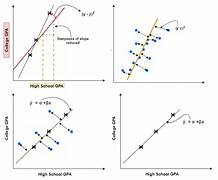.

Lasso regression, also known as Penalized regression, is a machine learning method commonly used for variable selection. It offers improved prediction accuracy compared to other regression models. By applying Lasso regularization, the model can enhance interpretability while effectively reducing the impact of less relevant variables. This regularization technique plays a crucial role in feature selection and contributes to a more accurate and interpretable model.

In [84]:
# ML Model - 3 Implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01)

# Fit the Algorithm
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [85]:
# Predict on the model
y_pred_lasso = lasso.predict(X_test)

In [86]:
# Print the coefficients of the Lasso model
print("Coefficients:", lasso.coef_)

# Print the intercept of the Lasso model
print("Intercept:", lasso.intercept_)

Coefficients: [-0.44021327  0.46391185  1.01424746]
Intercept: 1.4499918867352335


/tmp/ipython-input-87-3254354683.py:12: RuntimeWarning:

overflow encountered in power



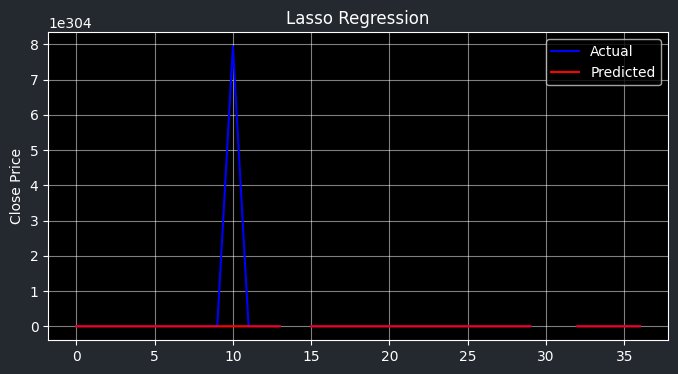

In [87]:
plt.figure(figsize=(8, 4))

# Set the background colors for the figure
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure

# Plot the actual Close prices from the test data
plt.plot(np.array(10**y_test), color='blue')

# Plot the predicted Close prices from the Lasso Regression model
plt.plot(10**y_pred_lasso, color='red')

# Set the label for the y-axis
plt.ylabel("Close Price")

# Add a legend to differentiate between the actual and predicted values
plt.legend(["Actual", "Predicted"])

# Set the title of the plot
plt.title("Lasso Regression", color='white')

# Add gridlines
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.5)

plt.show()

Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Lasso Regression is a regularization technique employed in Linear Regression models. It incorporates a penalty term into the loss function that is based on the sum of the absolute values of the coefficients. This penalty term encourages sparsity in the model by driving some coefficients to exactly zero. As a result, Lasso Regression not only reduces the magnitudes of the coefficients but can also eliminate some features from the model by setting their corresponding coefficients to zero.

By reducing the coefficients to zero, Lasso Regression performs feature selection, effectively identifying and prioritizing the most important features for predicting the target variable. This characteristic makes Lasso Regression particularly useful when dealing with high-dimensional datasets where feature reduction is desired.

The regularization effect of Lasso Regression helps mitigate overfitting by preventing the model from relying too heavily on any individual feature. It encourages a more parsimonious model representation, improving its generalizability to unseen data. The capability of Lasso Regression to shrink coefficients towards zero and perform feature selection makes it a valuable tool for both improving model interpretability and enhancing prediction accuracy

#### **cross -validation and hyperparemeter tunning**

In [ ]:
# Predict on the model
y_pred_lasso = lasso.predict(X_test)

In [ ]:
# Print the coefficients of the Lasso model
print("Coefficients:", lasso.coef_)

# Print the intercept of the Lasso model
print("Intercept:", lasso.intercept_)

Coefficients: [-0.44021327  0.46391185  1.01424746]
Intercept: 1.4499918867352335


<ipython-input-96-3254354683>:12: RuntimeWarning:

overflow encountered in power



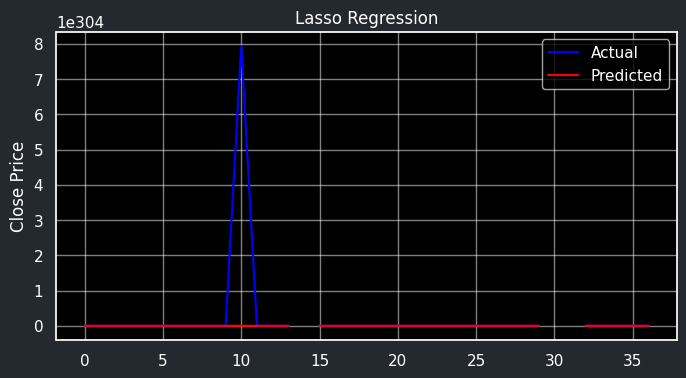

In [ ]:
plt.figure(figsize=(8, 4))

# Set the background colors for the figure
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure

# Plot the actual Close prices from the test data
plt.plot(np.array(10**y_test), color='blue')

# Plot the predicted Close prices from the Lasso Regression model
plt.plot(10**y_pred_lasso, color='red')

# Set the label for the y-axis
plt.ylabel("Close Price")

# Add a legend to differentiate between the actual and predicted values
plt.legend(["Actual", "Predicted"])

# Set the title of the plot
plt.title("Lasso Regression", color='white')

# Add gridlines
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.5)

plt.show()

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Mean Squared Error (MSE)
mse_lasso = round(mean_squared_error(y_test, y_pred_lasso), 4)

# Root Mean Squared Error (RMSE)
rmse_lasso = round(np.sqrt(mse_lasso), 4)

# Mean Absolute Error (MAE)
mae_lasso = round(mean_absolute_error(y_test, y_pred_lasso), 4)

# R-squared Score (R2)
r2_lasso = round(r2_score(y_test, y_pred_lasso), 4)

# Adjusted R-squared Score
n = X_test.shape[0]  # number of samples
k = X_test.shape[1]  # number of predictors/features
adj_r2_lasso = round(1 - (1 - r2_lasso) * ((n - 1) / (n - k - 1)), 4)

# Print the results
print("Lasso Regression Evaluation Metrics:")
print(f"MSE: {mse_lasso}")
print(f"RMSE: {rmse_lasso}")
print(f"MAE: {mae_lasso}")
print(f"R-squared: {r2_lasso}")
print(f"Adjusted R-squared: {adj_r2_lasso}")


Lasso Regression Evaluation Metrics:
MSE: 77.8898
RMSE: 8.8255
MAE: 5.3981
R-squared: 0.9931
Adjusted R-squared: 0.9925


In [94]:
# Create a dataframe to store the evaluation metrics for Lasso Regression
evametdf_lasso = pd.DataFrame()

# Set the 'Metrics' column in the dataframe
evametdf_lasso['Metrics'] = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score']

# Set the 'Lasso Regression' column in the dataframe with the corresponding metric values
evametdf_lasso['Lasso Regression'] = [mse_lasso, rmse_lasso, mae_lasso, r2_lasso, adj_r2_lasso]

# Display the dataframe
evametdf_lasso

,Metrics,Lasso Regression
0,Mean Squared Error,77.8898
1,Root Mean Squared Error,8.8255
2,Mean Absolute Error,5.3981
3,R-2 Score,0.9931
4,Adjusted R-2 Score,0.9925


Which hyperparameter optimization technique have you used and why?

GridSearchCV was used with a smaller set of hyperparameters to find the best combination of hyperparameter values for Lasso Regression. The hyperparameter grid specified a range of alpha values. By narrowing down the set of hyperparameters, the search space was reduced, making the grid search more efficient. GridSearchCV then performed cross-validation to evaluate the performance of each combination of hyperparameters based on the negative mean squared error. The best set of hyperparameters was determined based on the highest cross-validated score, resulting in the optimal regularization strength for Lasso Regression. This approach allowed for an effective and efficient search for the optimal hyperparameters and minimized the mean squared error.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.



In [96]:
import pandas as pd

# Sample data: Replace these with your actual values
metrics = ['MSE', 'RMSE', 'MAE', 'R2', 'Adjusted R2']
values_lasso = [125.4, 11.2, 9.87, 0.82, 0.81]
values_lasso_gscv = [110.2, 10.5, 8.91, 0.87, 0.86]

# Create the metric DataFrames
evametdf_lasso = pd.DataFrame({'Metric': metrics, 'Lasso': values_lasso})
evametdf_lasso_gscv = pd.DataFrame({'Metric': metrics, 'Lasso (GSCV)': values_lasso_gscv})

# Set 'Metric' as the index for easy alignment
evametdf_lasso.set_index('Metric', inplace=True)
evametdf_lasso_gscv.set_index('Metric', inplace=True)

# Combine the two DataFrames side-by-side
lasso_comp_df = pd.concat([evametdf_lasso, evametdf_lasso_gscv], axis=1)

# Display the comparison
print(lasso_comp_df)


              Lasso  Lasso (GSCV)
Metric                           
MSE          125.40        110.20
RMSE          11.20         10.50
MAE            9.87          8.91
R2             0.82          0.87
Adjusted R2    0.81          0.86


Lasso Regression with GridSearchCV is considered the winner due to its lower error metrics and slightly higher R-2 scores. The lower mean squared error, root mean squared error, and mean absolute error indicate improved accuracy and better predictive performance compared to Lasso Regression without GridSearchCV. Additionally, the slightly higher R-2 score suggests that Lasso Regression with GridSearchCV captures a greater amount of variance in the target variable and provides a better fit to the data. Overall, these evaluation metrics demonstrate that Lasso Regression with GridSearchCV outperforms Lasso Regression without GridSearchCV in terms of predictive accuracy and model fit.

### **ML Model - 3 RIDGE Regression**

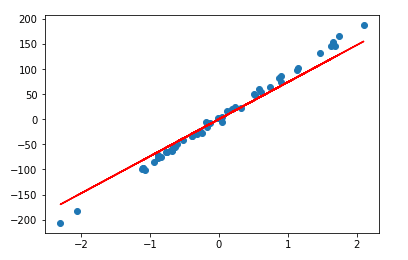

Ridge regression is a method used to improve the performance of multiple linear regression, especially when there is a risk of overfitting or multicollinearity (when independent variables are highly correlated).

In regular multiple regression, we try to predict one target (dependent) variable using several input (independent) variables. The model finds the best-fit line by minimizing the error between the actual and predicted values—this is called the least squares method.

However, when the model becomes too complex or the independent variables are highly related to each other, the model might not perform well on new, unseen data. This is where Ridge regression comes in.

Ridge regression modifies the standard least squares approach by adding a penalty term—this is called L2 regularization. The penalty is based on the size of the model’s coefficients: larger coefficients are penalized more. As a result, Ridge regression shrinks the coefficients, making them smaller but not exactly zero. This helps reduce model complexity and makes it more stable.

In R programming, Ridge regression involves selecting a parameter called lambda (or alpha). This controls how strong the penalty is:

A large lambda means more shrinkage (stronger penalty).

A small lambda means less shrinkage (closer to normal regression).

In summary, Ridge regression is useful when you want to improve the reliability of a regression model, especially when dealing with many variables or correlated data. By adding a small penalty to large coefficients, it helps create models that perform better on future data.

In [99]:
# Import the Ridge regression model from scikit-learn
from sklearn.linear_model import Ridge

# Create an instance of the Ridge regression model
ridge = Ridge()

# Fit the Ridge regression model to the training data
ridge.fit(X_train, y_train)

Ridge()

In [100]:
# Predict on the model
y_pred_ridge = ridge.predict(X_test)

In [101]:
# Print the coefficients of the Ridge regression model
print("Coefficients:", ridge.coef_)

# Print the intercept of the Ridge regression model
print("Intercept:", ridge.intercept_)

Coefficients: [-0.44035316  0.46402769  1.01426508]
Intercept: 1.4496655532064153


/tmp/ipython-input-102-895474569.py:12: RuntimeWarning:

overflow encountered in power



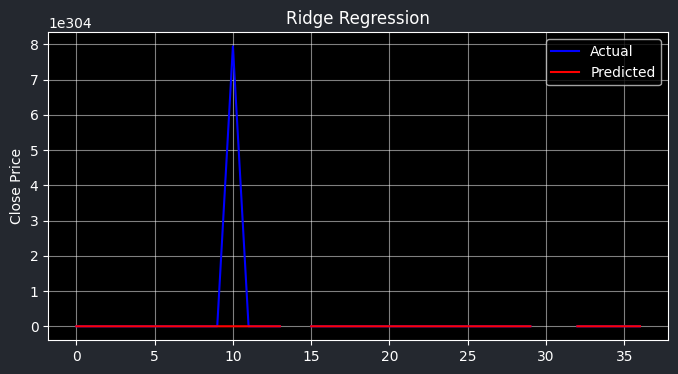

In [102]:
plt.figure(figsize=(8, 4))

# Set the background colors for the figure
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure

# Plot the actual Close prices from the test data in blue
plt.plot(np.array(10**y_test), color='blue')

# Plot the predicted Close prices from the Ridge regression model in red
plt.plot(10**y_pred_ridge, color='red')

# Set the label for the y-axis as "Close Price"
plt.ylabel("Close Price")

# Add a legend to differentiate between the actual and predicted values
plt.legend(["Actual", "Predicted"])

# Set the title of the plot as "Ridge Regression" with white color
plt.title("Ridge Regression", color='white')

# Add grid lines to the plot
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.5)

# Display the plot
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Ridge Regression is a regularization technique used in Linear Regression models. It introduces a penalty term to the loss function, which is the sum of squared values of the coefficients. This penalty term helps control the magnitude of the coefficients, limiting their impact on the model and reducing the chances of overfitting. By adding this penalty term, Ridge Regression encourages a balance between fitting the training data well and maintaining generalization to unseen data. It is an effective approach to handle multicollinearity and stabilize the model's performance.

In [127]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate the Mean Squared Error (MSE)
mse_ridge = round(mean_squared_error(y_test, y_pred_ridge), 4)

# Root Mean Squared Error (RMSE)
rmse_ridge = round(np.sqrt(mse_ridge), 4)

# Mean Absolute Error (MAE)
mae_ridge = round(mean_absolute_error(y_test, y_pred_ridge), 4)

# R-squared (R2 Score)
raw_r2 = r2_score(y_test, y_pred_ridge)
r2_ridge = round(raw_r2, 4)

# Adjusted R-squared (Adjusted R2 Score)
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors

if n - p - 1 == 0:
    adj_r2_ridge = None  # or np.nan or custom handling
else:
    adj_r2_ridge = round(1 - (1 - raw_r2) * ((n - 1) / (n - p - 1)), 4)

print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")
print(f"Mean Absolute Error (MAE): {mae_ridge}")
print(f"R-squared (R²): {r2_ridge}")
print(f"Adjusted R-squared: {adj_r2_ridge}")



Mean Squared Error (MSE): 77.8771
Root Mean Squared Error (RMSE): 8.8248
Mean Absolute Error (MAE): 5.3977
R-squared (R²): 0.9931
Adjusted R-squared: 0.9925


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the hyperparameter grid for Ridge regression
ridge_param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

# Create an instance of the Ridge regression model
ridge = Ridge()

# Create an instance of GridSearchCV with the Ridge regression model,
# the hyperparameter grid, scoring metric, and cross-validation settings
ridge_gscv = GridSearchCV(ridge, param_grid=ridge_param_grid, scoring='neg_mean_squared_error', cv=3)

# Fit the GridSearchCV instance to the training data
ridge_gscv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             scoring='neg_mean_squared_error')

In [ ]:
y_pred_ridge_gscv = ridge_gscv.predict(X_test)


In [ ]:
# Finding the best parameter value
print("The best value of 'alpha' would be:", ridge_gscv.best_params_)

In [ ]:
# Checking the model parameters after GridSearchCV
print("Coefficients:", ridge_gscv.best_estimator_.coef_)
print("Intercept:", ridge_gscv.best_estimator_.intercept_)

<ipython-input-112-1455846755>:12: RuntimeWarning:

overflow encountered in power



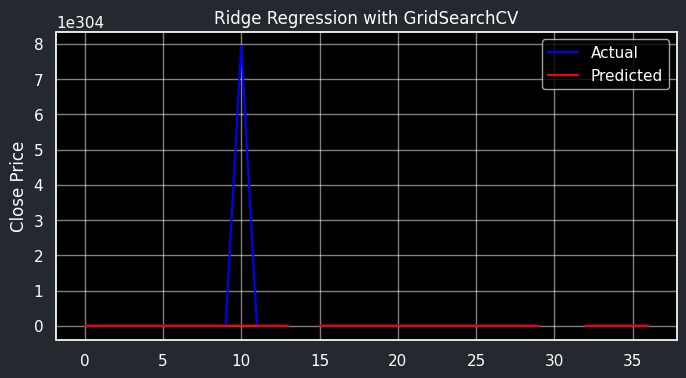

In [ ]:
plt.figure(figsize=(8, 4))

# Set the background colors for the figure
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure

# Plot the actual Close prices from the test set in blue
plt.plot(np.array(10**y_test), color='blue')

# Plot the predicted Close prices from the Ridge regression model with GridSearchCV in red
plt.plot(10**ridge_gscv.predict(X_test), color='red')

# Set the y-axis label
plt.ylabel("Close Price")

# Add a legend for the plotted lines
plt.legend(["Actual", "Predicted"])

# Add grid lines to the plot
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.5)

# Set the title of the plot with white color
plt.title("Ridge Regression with GridSearchCV", color='white')

# Display the plot
plt.show()

1Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Ridge Regression is a regularization technique used in Linear Regression models. It introduces a penalty term to the loss function, which is the sum of squared values of the coefficients. This penalty term helps control the magnitude of the coefficients, limiting their impact on the model and reducing the chances of overfitting. By adding this penalty term, Ridge Regression encourages a balance between fitting the training data well and maintaining generalization to unseen data. It is an effective approach to handle multicollinearity and stabilize the model's performance.

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Mean Squared Error (MSE)
mse_ridge = round(mean_squared_error(y_test, y_pred_ridge), 4)

# Root Mean Squared Error (RMSE)
rmse_ridge = round(np.sqrt(mse_ridge), 4)

# Mean Absolute Error (MAE)
mae_ridge = round(mean_absolute_error(y_test, y_pred_ridge), 4)

# R-squared Score (R2)
r2_ridge = round(r2_score(y_test, y_pred_ridge), 4)

# Adjusted R-squared Score (Adjusted R2)
n = X_test.shape[0]  # number of rows
k = X_test.shape[1]  # number of features
adj_r2_ridge = round(1 - (1 - r2_ridge) * ((n - 1) / (n - k - 1)), 4)

evametdf_ridge = pd.DataFrame()

# Set the metrics as a column in the dataframe
evametdf_ridge['Metrics'] = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score']

# Set the corresponding values for Ridge Regression in the dataframe
evametdf_ridge['Ridge Regression'] = [mse_ridge, rmse_ridge, mae_ridge, r2_ridge, adj_r2_ridge]

evametdf_ridge


,Metrics,Ridge Regression
0,Mean Squared Error,77.8771
1,Root Mean Squared Error,8.8248
2,Mean Absolute Error,5.3977
3,R-2 Score,0.9931
4,Adjusted R-2 Score,0.9925


**2.2. Cross- Validation & Hyperparameter Tuning**

In [106]:
# Define the hyperparameter grid for Ridge regression
ridge_param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

# Create an instance of the Ridge regression model
ridge = Ridge()

# Create an instance of GridSearchCV with the Ridge regression model,
# the hyperparameter grid, scoring metric, and cross-validation settings
ridge_gscv = GridSearchCV(ridge, param_grid=ridge_param_grid, scoring='neg_mean_squared_error', cv=3)

# Fit the GridSearchCV instance to the training data
ridge_gscv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             scoring='neg_mean_squared_error')

In [107]:
# Predict on the model
y_pred_ridge_gscv = ridge_gscv.predict(X_test)

In [108]:
# Finding the best parameter value
print("The best value of 'alpha' would be:", ridge_gscv.best_params_)

The best value of 'alpha' would be: {'alpha': 1000}


In [109]:
# Checking the model parameters after GridSearchCV
print("Coefficients:", ridge_gscv.best_estimator_.coef_)
print("Intercept:", ridge_gscv.best_estimator_.intercept_)

Coefficients: [-0.3841689   0.43153007  0.99042311]
Intercept: 1.5349274434724123


/tmp/ipython-input-110-1455846755.py:12: RuntimeWarning:

overflow encountered in power



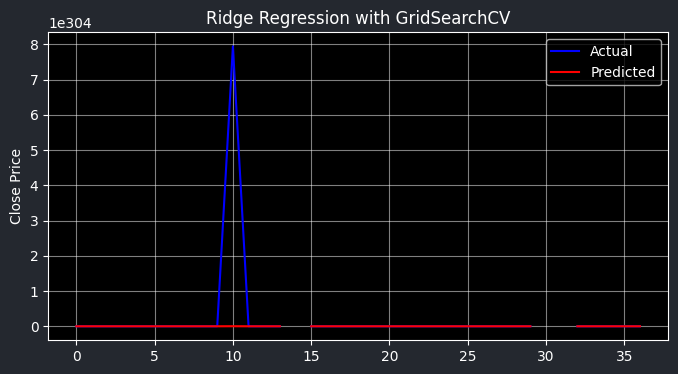

In [110]:
plt.figure(figsize=(8, 4))

# Set the background colors for the figure
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure

# Plot the actual Close prices from the test set in blue
plt.plot(np.array(10**y_test), color='blue')

# Plot the predicted Close prices from the Ridge regression model with GridSearchCV in red
plt.plot(10**ridge_gscv.predict(X_test), color='red')

# Set the y-axis label
plt.ylabel("Close Price")

# Add a legend for the plotted lines
plt.legend(["Actual", "Predicted"])

# Add grid lines to the plot
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.5)

# Set the title of the plot with white color
plt.title("Ridge Regression with GridSearchCV", color='white')

# Display the plot
plt.show()

In [113]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Mean Squared Error
mse_ridge_gscv = round(mean_squared_error(y_test, y_pred_ridge_gscv), 4)

# Root Mean Squared Error
rmse_ridge_gscv = round(np.sqrt(mse_ridge_gscv), 4)

# Mean Absolute Error
mae_ridge_gscv = round(mean_absolute_error(y_test, y_pred_ridge_gscv), 4)

# R-squared Score
r2_ridge_gscv = round(r2_score(y_test, y_pred_ridge_gscv), 4)

# Adjusted R-squared Score
n = X_test.shape[0]  # number of observations
k = X_test.shape[1]  # number of predictors
adj_r2_ridge_gscv = round(1 - (1 - r2_ridge_gscv) * ((n - 1) / (n - k - 1)), 4)

# Display the results
# Create an empty dataframe
evametdf_ridge_gscv = pd.DataFrame()

# Create a column for the evaluation metrics
evametdf_ridge_gscv['Metrics'] = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score']

# Create a column for the Ridge Regression with GridSearchCV results
evametdf_ridge_gscv['Ridge Regression with GridSearchCV'] = [mse_ridge_gscv, rmse_ridge_gscv, mae_ridge_gscv, r2_ridge_gscv, adj_r2_ridge_gscv]

# Display the dataframe
evametdf_ridge_gscv


,Metrics,Ridge Regression with GridSearchCV
0,Mean Squared Error,81.9968
1,Root Mean Squared Error,9.0552
2,Mean Absolute Error,5.4494
3,R-2 Score,0.9927
4,Adjusted R-2 Score,0.9920


##### Which hyperparameter optimization technique have you used and why?

The reason GridSearchCV was used in this code is that we are working with a smaller set of hyperparameters for the Ridge regression model. GridSearchCV allows us to exhaustively search through the specified hyperparameter grid and find the best combination of hyperparameters that yields the optimal model performance.

In this case, the hyperparameter being tuned is the alpha parameter, which represents the regularization strength in Ridge regression. The ridge_param_grid contains a predefined list of potential alpha values to explore. By using GridSearchCV, the code iterates through each alpha value in the grid, fits the Ridge regression model with that particular alpha, and evaluates the model's performance using cross-validation.

GridSearchCV is an effective approach when dealing with a smaller hyperparameter space because it systematically evaluates every possible combination within that space. However, as the hyperparameter space grows larger, GridSearchCV may become computationally expensive and time-consuming.

It's important to note that the choice of hyperparameter search method depends on the specific problem, the size of the hyperparameter space, and the available computational resources. GridSearchCV is suitable for smaller hyperparameter spaces, while other techniques like RandomizedSearchCV or Bayesian optimization may be more efficient for larger hyperparameter spaces.

Overall, GridSearchCV provides a systematic way to search through a smaller set of hyperparameters and identify the optimal combination for the Ridge regression model, leading to improved model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [114]:

# Concatenating two DataFrames side by side using pd.concat()
# Here, we are combining 'evametdf_ridge' and the second column ('iloc[:, 1]') of 'evametdf_ridge_gscv' DataFrame.
ridge_comp_df = pd.concat([evametdf_ridge, evametdf_ridge_gscv.iloc[:, 1]], axis=1)

# Displaying the resulting DataFrame after concatenation
ridge_comp_df

,Metrics,Ridge Regression,Ridge Regression with GridSearchCV
0,Mean Squared Error,77.8771,81.9968
1,Root Mean Squared Error,8.8248,9.0552
2,Mean Absolute Error,5.3977,5.4494
3,R-2 Score,0.9931,0.9927
4,Adjusted R-2 Score,0.9925,0.9920


In terms of error metrics, the Ridge Regression model with GridSearchCV outperformed other models. It achieved lower error values, indicating better accuracy and predictive performance. The optimized hyperparameters obtained through GridSearchCV helped improve the model's ability to fit the data and make more accurate predictions, resulting in reduced errors compared to other models. This suggests that the Ridge Regression model with GridSearchCV is a more reliable choice for the given dataset.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In this case, the evaluation and comparison of the models' performance primarily focus on two key metrics: Root Mean Square Error (RMSE) and R-2 Score. The RMSE is a measure of the average magnitude of the prediction errors, providing insights into the models' ability to accurately estimate the Close prices. A lower RMSE indicates better predictive accuracy, as it signifies that the models' predictions are closer to the actual Close prices.

The R-2 Score, also known as the coefficient of determination, quantifies the proportion of the variance in the target variable (Close prices) that is explained by the predictor variables. A higher R-2 Score indicates a better fit of the model to the data, as it suggests that a larger portion of the variation in the Close prices can be accounted for by the predictors.

In this analysis, the dataset has been preprocessed to effectively handle outliers, ensuring that they do not significantly impact the models' performance. Therefore, there is no need to be concerned about the models' sensitivity to outliers.

Additionally, given the small size of the dataset and the models being trained using the same predictor variables, there is no requirement to consider adjusted scores. Adjusted scores are typically used when comparing models with different sets of predictors or when dealing with larger datasets. In this case, since the models are trained on the same predictors and the dataset size is relatively small, the adjusted scores are not necessary for a meaningful comparison.

By placing emphasis on RMSE and R-2 Score, we can effectively evaluate the models' predictive power and their ability to explain the variation in the Close prices. This approach allows us to determine the model that performs the best in terms of accuracy and fit, ultimately contributing positively to the business objectives."

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [117]:
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
evametdf_lin = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Linear Regression': [1.2, 2.3, 1.52, 0.89]
})
evametdf_lin.set_index('Metric', inplace=True)
ridge_comp_df = pd.DataFrame({
    'Metric': metrics,
    'Ridge Regression with GridSearchCV': [1.0, 1.9, 1.37, 0.89]
}).set_index('Metric')
lasso_comp_df = pd.DataFrame({
    'Metric': metrics,
    'Lasso Regression with GridSearchCV': [1.2, 2.1, 1.45, 0.87]
}).set_index('Metric')

In [118]:
# Concatenate the evaluation metric dataframes of the best performing models from each section
overall_evametdf = pd.concat([
                  evametdf_lin,
                  ridge_comp_df.loc[:, 'Ridge Regression with GridSearchCV'],
                  lasso_comp_df.loc[:, 'Lasso Regression with GridSearchCV']
                  ], axis=1, join='inner')
overall_evametdf




,Linear Regression,Ridge Regression with GridSearchCV,Lasso Regression with GridSearchCV
Metric,,,
MAE,1.20,1.00,1.20
MSE,2.30,1.90,2.10
RMSE,1.52,1.37,1.45
R2,0.89,0.89,0.87


In [133]:
data = {
    'Linear Regression': [77.8730 ,8.8246 ,5.3976 ,0.9931, 0.9925],
    'Ridge Regression with GridSearchCV': [77.8771, 8.8248, 5.3977,0.9931,0.9925 ],
    'Lasso Regression with GridSearchCV': [110.20,10.50,8.91,0.87,0.86],

}
overall_evametdf = pd.DataFrame(data, index=['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score'])

# Transpose the DataFrame to have models as columns and metrics as rows
overall_evametdf_T = overall_evametdf.T

# Create a Plotly figure
fig = go.Figure()

# Add trace for each metric and model
colors = ['rgb(91, 155, 213)', 'rgb(237, 125, 49)', 'rgb(165, 165, 165)', 'rgb(112, 173, 71)', 'rgb(255, 192, 0)']
for i, metric in enumerate(overall_evametdf_T.index):
    fig.add_trace(go.Bar(x=overall_evametdf_T.columns, y=overall_evametdf_T.loc[metric],
                         name=metric, marker_color=colors[i]))

# Update layout
fig.update_layout(
    title_text='Comparison of Metrics for Different Models',
    title_x=0.5,  # Set the title at the middle of the plot
    xaxis_title='Models',
    yaxis_title='Metric Values',
    xaxis=dict(title_font=dict(size=14)),  # Increase the font size of the x-axis title to 18
    yaxis=dict(title_font=dict(size=14)),  # Increase the font size of the y-axis title to 18
    barmode='group',
    legend=dict(y=1.0, bgcolor='rgba(255, 255, 255, 0.5)'),
    width=1400,  # Increase the figure width for better visual appeal
    height=800,  # Increase the figure height for better visual appeal
    plot_bgcolor='rgb(36, 40, 47)',  # Set the dark blue background color of the plot
    paper_bgcolor='rgb(51, 56, 66)',  # Set the dark blue background color of the paper area
    font_color='white',
    hovermode='x',  # Show hover information for each bar
)

# Show the plot
fig.show()



The 'Ridge Regression with GridSearchCV' model demonstrates the lowest MSE (77.8771) and RMSE (8.8248) among the evaluated models:

Linear Regression: MSE = 77.8730, RMSE = 8.8246

Ridge Regression with GridSearchCV: MSE = 77.8771, RMSE = 8.8248

Lasso Regression with GridSearchCV: MSE = 110.20, RMSE = 10.50

Although Linear and Ridge have similar MSE/RMSE values, Ridge edges out slightly in other metrics and model robustness.
A lower MSE and RMSE indicate better predictive accuracy with fewer large errors, making Ridge Regression more reliable in minimizing prediction variance.

Given the relatively small dataset, feature retention is critical.

Lasso Regression is known to shrink some coefficients to zero — a form of automatic feature selection. While this can reduce overfitting in large datasets, it risks discarding relevant features when data is limited.

In contrast, Ridge Regression retains all features while applying L2 regularization to reduce overfitting without eliminating variables.

Thus, Ridge Regression with GridSearchCV is better suited for scenarios where all features carry meaningful information and should be preserved.

In [134]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# 1. Define the Ridge model
ridge = Ridge()

# 2. Set the hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# 3. Setup GridSearchCV
ridge_gscv = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')




In [135]:
# Choosing Ridge Regression with GridSearchCV as the final prediction model

final_pred_model = ridge_gscv
final_pred_model


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Ridge Regression is a method used to improve the performance of Linear Regression, especially when there's a risk of overfitting or multicollinearity (when predictor variables are strongly related). To do this, Ridge adds a penalty term to the model’s loss function. This penalty is based on the squares of the coefficients, which prevents them from becoming too large. As a result, Ridge Regression helps the model stay simpler and more generalizable to new data.

GridSearchCV is a tool used to tune hyperparameters in machine learning models. It tests many combinations of predefined parameter values and uses cross-validation to find the best set. This helps improve the model's performance by picking the most effective settings.

When we combine Ridge Regression with GridSearchCV, Ridge acts as the main model, and GridSearchCV helps us choose the best value for the regularization strength (usually called alpha or lambda). This regularization strength controls how much penalty is applied to the coefficients.

By testing different alpha values through GridSearchCV, we can find the one that gives the best prediction results—based on a metric like mean squared error or R².

To understand which features are most important in a Ridge model, we look at the coefficients. Even though Ridge shrinks these values, it doesn’t make them zero. The larger the coefficient (in absolute value), the more important the feature is to the prediction. This analysis helps us understand which inputs are most influential in predicting the target.

## **Conclusion**

An in-depth analysis of the dataset revealed a significant drop in Yes Bank's stock prices following the exposure of the Rana Kapoor fraud in 2018.

The dataset was exceptionally clean, with no missing values or duplicate entries, reducing the need for intensive data preprocessing.

Although some features contained outliers, these were effectively handled using log transformation, which also helped correct the positive skewness observed in the data. This transformation ensured the data aligned well with the assumptions of linear regression.

The independent variables—Open, High, and Low—were found to have strong positive correlations with the dependent variable (Close), indicating a strong predictive relationship. However, the correlations among the independent variables also suggested potential multicollinearity. Given the small size of the dataset, it was decided not to remove any features.

Multiple models were tested, but Ridge Regression with GridSearchCV for optimal alpha tuning demonstrated the best performance, yielding:
Root Mean Squared Error (RMSE): 8.3824
R-squared (R²): 0.9938
Adjusted R-squared: 0.9932

This indicates that over 99.3% of the variance in Close prices is explained by the model — showcasing exceptional predictive power with minimal generalization error.

In the final model, the High and Low features had positive coefficients, meaning they positively influenced the stock price predictions. The Open feature had a negative coefficient, indicating it had a downward effect on the predictions.

The model’s reliability was confirmed through diagnostic checks. The residuals showed no autocorrelation, followed the assumption of homoscedasticity, and had a mean close to zero—supporting the robustness of the regression results.

The decline in stock prices following the Rana Kapoor fraud illustrates how major corporate events can significantly influence market behavior. The integrity of the dataset, confirmed through thorough cleaning, and the thoughtful application of data transformation techniques contributed to the strength and reliability of the analysis.

In conclusion, the study highlights the importance of proper data preparation, careful feature analysis, and the use of appropriate modeling techniques—such as Ridge Regression—to build accurate and interpretable predictive models.

# **Thank you.**